# WH Plots

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplhep as hep
import warnings
from plot_utils import *

warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 70
plt.style.use(hep.style.CMS)
hep.style.use("CMS")

## Notebook Parameters
The following couple cells define the input and output directories, and load in the desired .pkl files into the `plots` nested dictionary.<br>
`output_label`: _str_, saves plots as `<output_label>+<plot_name>.<file_ext>`.<br>
`file_ext`: _str_, see above.<br>

In [2]:
# output parameters
output_label = '/home/submit/lavezzo/public_html/SUEP/plots/WH_4_2_ABCD/'
file_ext = '.pdf'
saveFigs = False

# create output dir
if not os.path.isdir(output_label): 
    print("Creating", output_label)
    os.mkdir(output_label)

The `plots` dictionary is used to store all the plots imported from the pickle files. Dimensions: (sample) x (plot label) <br> 
<br>
The `loader` function in `plot_utils.py` automatically merges bins and years, applies the lumis, the xsec for SUEP, and excludes some of the low QCD bins.<br>

In [3]:
# This part is meant to be flxeible, depending on what you want to import

# generate list of files that you want to merge histograms for
hist_dir = '/data/submit/lavezzo/SUEP/outputs/'
files_2018 = getHistLists(hist_dir, 'WH_4_2_ABCD', '../filelist/WH/list_2018_MC_WH.txt')
files_2018 = [f for f in files_2018 if 'WJetsToLNu_TuneCP5_13TeV-amcatnloFXFX' not in f] # exclude the inclusive samples --> bad stats
files_SUEP = ['/data/submit/lavezzo/SUEP/outputs/WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD.root', '/data/submit/lavezzo/SUEP/outputs//WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD.root']
files_SUEP_ttH = ['/data/submit/lavezzo/SUEP/outputs/ttHpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD.root']
files = files_2018 + files_SUEP + files_SUEP_ttH

bkgs = [
    "VH",
    "ttX",
    "VVV",
    "VG",
    "ST",
    "VV",
    "QCD_Pt",
    "DYJetsToLL_LHEFilterPtZ",
    "tt",
    "WJetsToLNu_Pt",
]

In [4]:
# load histograms, merge binned samples, apply lumis (and xsections for SUEP samples)
# output dimensions: (sample) x (plot label)
plots = loader(files, by_bin=True, verbose=False)
# load cutflows, merge binned samples, apply lumis (and xsections for SUEP samples)
# output dimensions: (sample) x (cut label)
cutflows = loader(files, by_bin=False, load_cutflows=True, verbose=False)
# make an 'MC' sample formed of summing different backgrounds
plots = combineSamples(plots, samples=bkgs, new_tag='MC')

In [8]:
# temprorary renaming, will write a function once we switch to cental samples
plots['SUEP-WH-M125.0_MD3.00_T3.00'] = plots['WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD']
cutflows['SUEP-WH-M125.0_MD3.00_T3.00'] = cutflows['WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD']

plots['SUEP-WH-M125.0_MD3.00_T0.75'] = plots['WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD']
cutflows['SUEP-WH-M125.0_MD3.00_T0.75'] = cutflows['WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD']

These are all the samples loaded.

In [9]:
for k in sorted(list(plots.keys())): print(k)

DYJetsToLL_LHEFilterPtZ
DYJetsToLL_LHEFilterPtZ-0To50
DYJetsToLL_LHEFilterPtZ-100To250
DYJetsToLL_LHEFilterPtZ-250To400
DYJetsToLL_LHEFilterPtZ-400To650
DYJetsToLL_LHEFilterPtZ-50To100
DYJetsToLL_LHEFilterPtZ-650ToInf
DYJetsToLL_M
DYJetsToLL_M-10to50
DYJetsToLL_M-50
MC
QCD_Pt
QCD_Pt_1000to1400
QCD_Pt_120to170
QCD_Pt_1400to1800
QCD_Pt_15to30
QCD_Pt_170to300
QCD_Pt_1800to2400
QCD_Pt_2400to3200
QCD_Pt_300to470
QCD_Pt_30to50
QCD_Pt_3200toInf
QCD_Pt_470to600
QCD_Pt_50to80
QCD_Pt_600to800
QCD_Pt_800to1000
QCD_Pt_80to120
ST
ST_s-channel_4f_leptonDecays
ST_t-channel_antitop_4f_InclusiveDecays
ST_t-channel_top_4f_InclusiveDecays
ST_tW_Dilept_5f_DR
ST_tW_antitop_5f_inclusiveDecays
ST_tW_top_5f_inclusiveDecays
SUEP-WH-M125.0_MD3.00_T0.75
SUEP-WH-M125.0_MD3.00_T3.00
TTTo2L2Nu
TTToSemiLeptonic
TTWJetsToQQ
TTZToLLNuNu_M-10
TTZToQQ
VG
VH
VHToNonbb_M125
VV
VVV
WGToLNuG
WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD
WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NAN

## SR

### Cutflows 

Print cutflow tables and plots.

Yields
+------------------------------------------------+-----------------------------+---------------+------------+-------------------------+------------+------------+------------+------------+--------+--------+--------+
|                   Selection                    | SUEP-WH-M125.0_MD3.00_T3.00 | WJetsToLNu_Pt |     tt     | DYJetsToLL_LHEFilterPtZ |   QCD_Pt   |     VV     |     ST     |     VG     |  VVV   |  ttX   |   VH   |
+------------------------------------------------+-----------------------------+---------------+------------+-------------------------+------------+------------+------------+------------+--------+--------+--------+
|                     Total                      |            25807            |   4.5767e+07  | 2.7135e+07 |        1.1867e+08       | 8.1894e+13 | 5.5317e+06 | 1.5153e+07 | 2.7679e+07 | 10712  | 169270 | 83457  |
|                    Gen cuts                    |            25807            |   4.5767e+07  | 2.7135e+07 |        1.1867e+08      

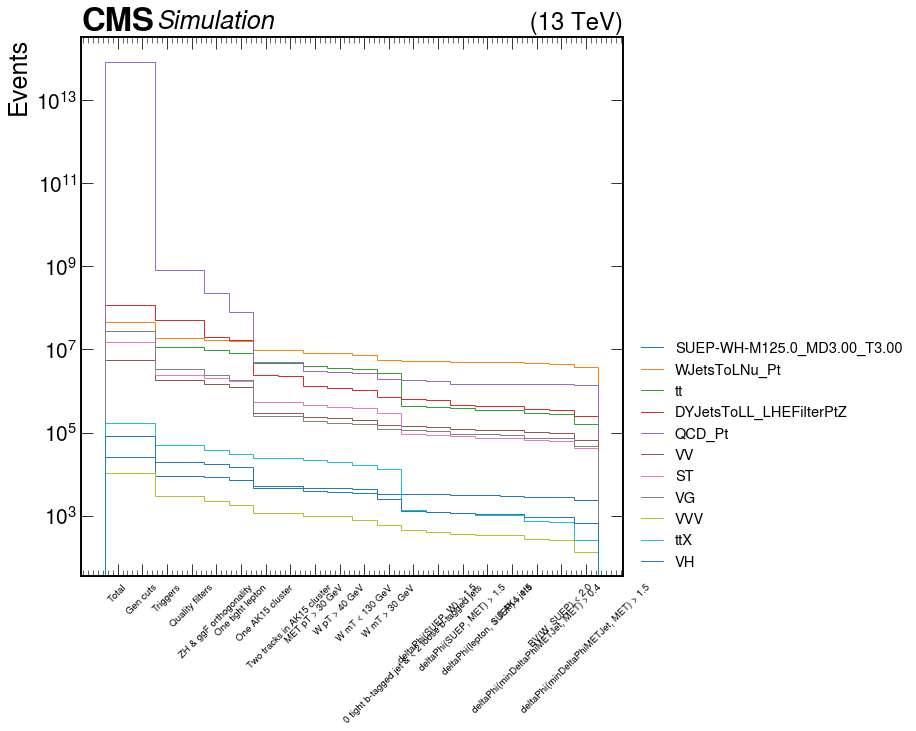

In [10]:
samples= ['SUEP-WH-M125.0_MD3.00_T3.00'] + bkgs[::-1]
selections = [
    'total', 
    'genCuts', 'allTriggers',  'qualityFilters', 'orthogonality', 'oneLepton', 'oneCluster', 'twoTracksInCluster',
    'MET_pt_>_30.0_SR',
    'W_pT_from_MET_>_40.0_SR',
    "W_mT_from_MET_<_130.0_SR", "W_mT_from_MET_>_30.0_SR",
    'bjetSel_==_1.0_SR',
    'deltaPhi_SUEP_W_>_1.5_SR', 'deltaPhi_SUEP_MET_>_1.5_SR', 'deltaPhi_lepton_SUEP_>_1.5_SR',
    'ngood_ak4jets_>_0.0_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_SR',
    'W_SUEP_BV_<_2.0_SR',
    'deltaPhi_minDeltaPhiMETJet_MET_>_1.5_SR',
]
selection_labels = [
    'Total',
    'Gen cuts', 'Triggers', 'Quality filters', 'ZH & ggF orthogonality', 'One tight lepton', 'One AK15 cluster', 'Two tracks in AK15 cluster',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    "W mT < 130 GeV", "W mT > 30 GeV",
    '0 tight b-tagged jet & < 2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets',
    'deltaPhi(minDeltaPhiMETJet, MET) > 0.4',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 1.5',
]

table = cutflow_table(cutflows, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=2)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(cutflows, samples, selections, selection_labels)
fig.show()

### N-1 Plots

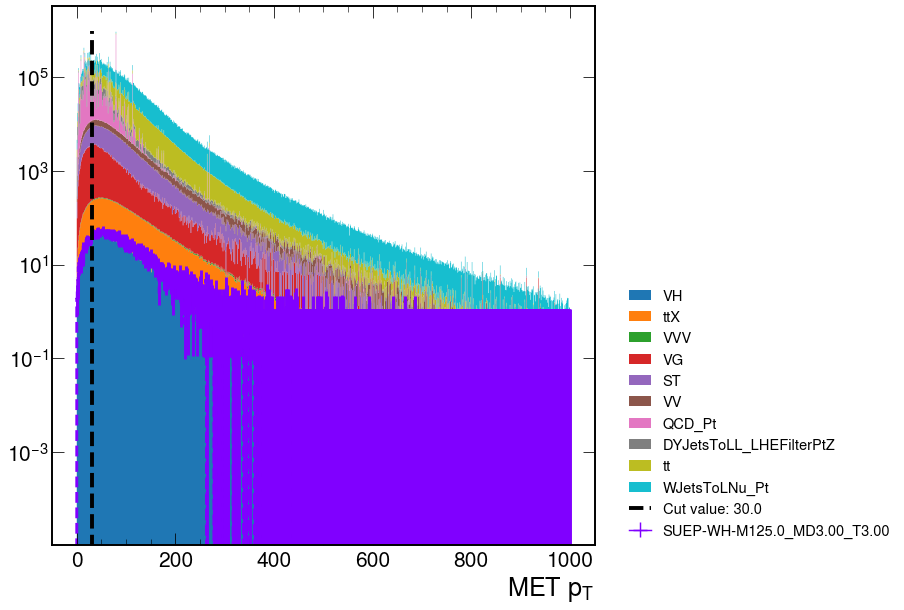

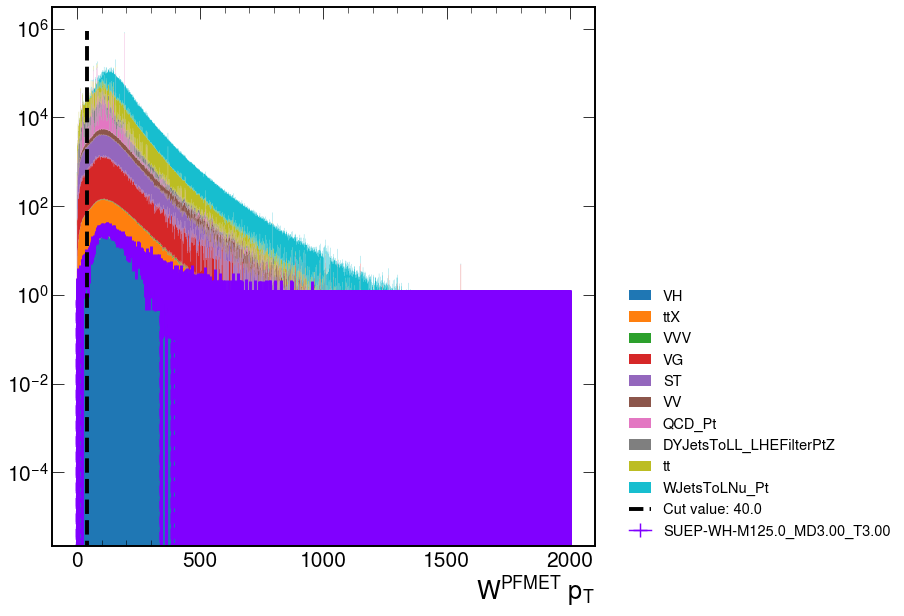

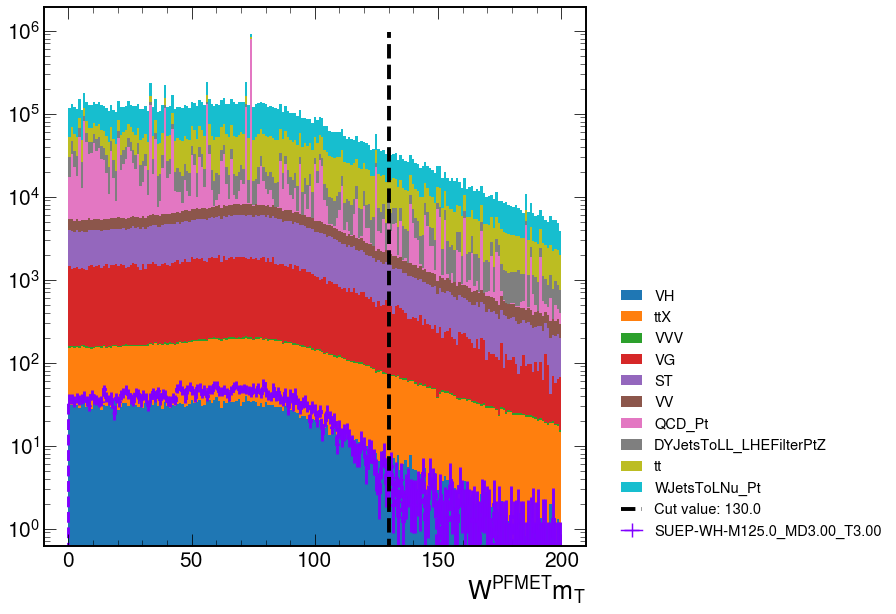

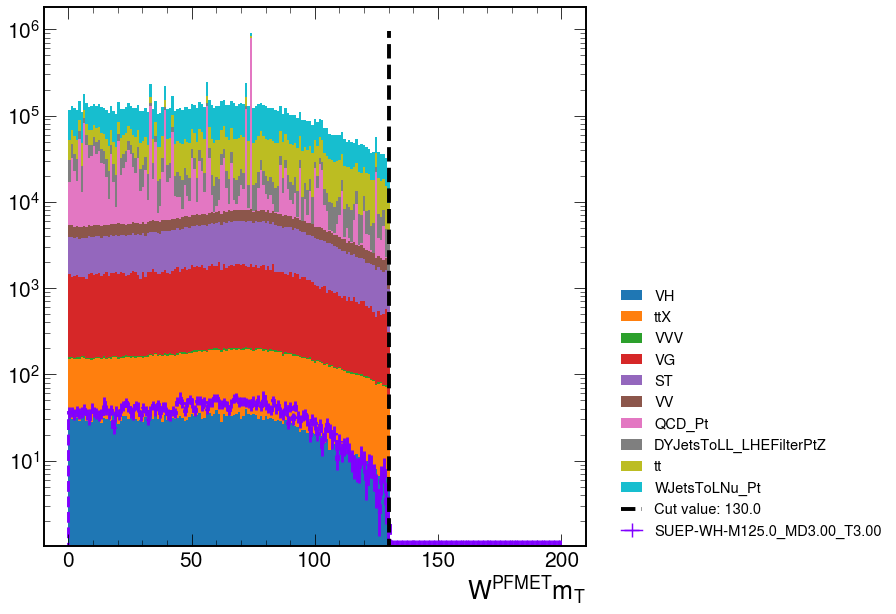

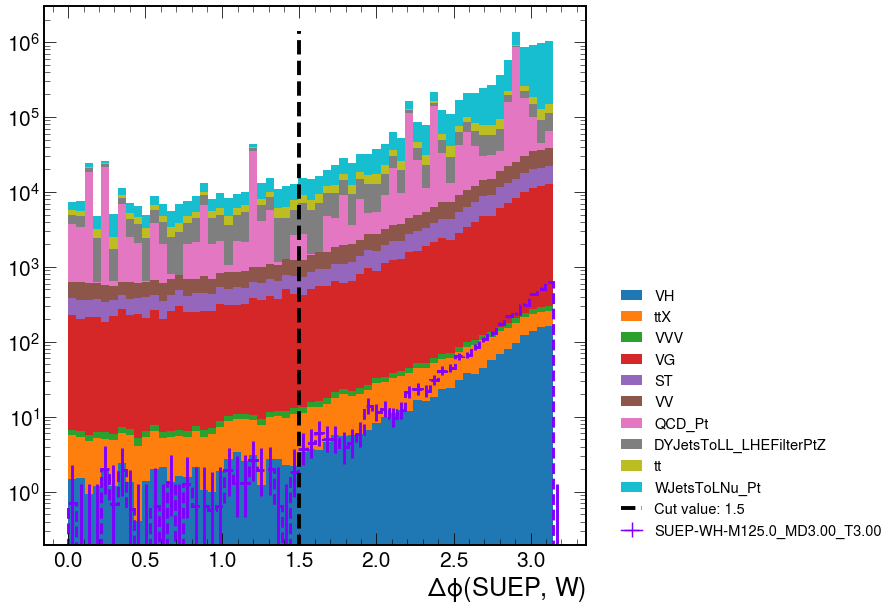

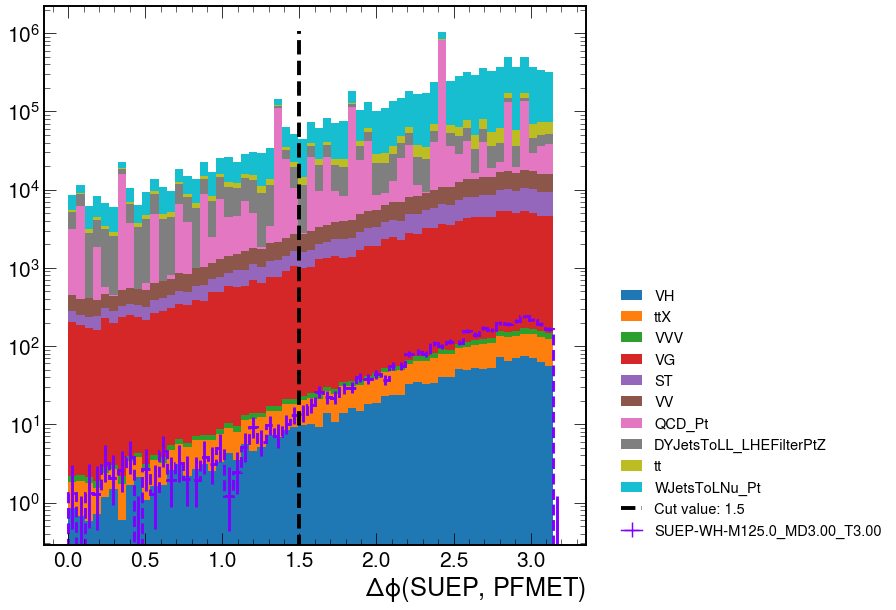

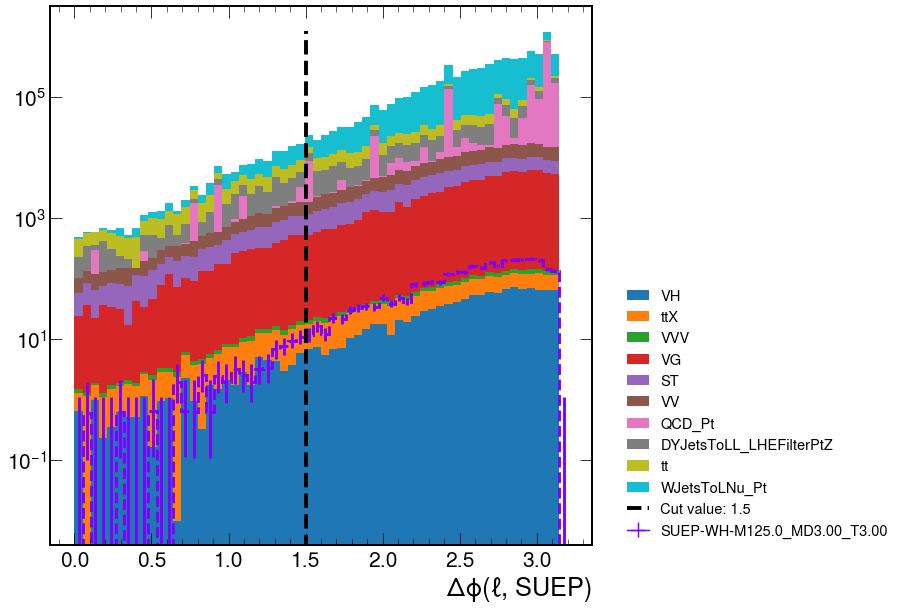

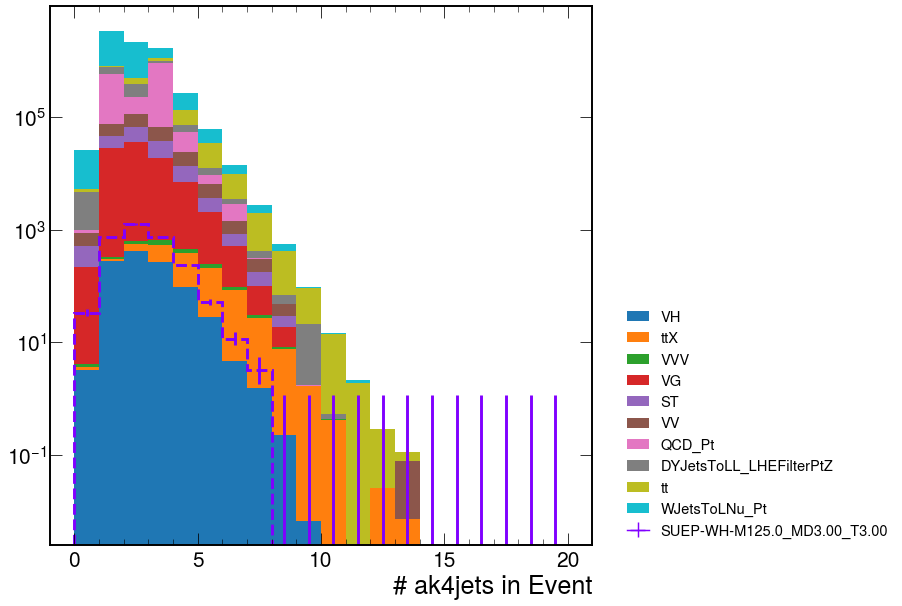

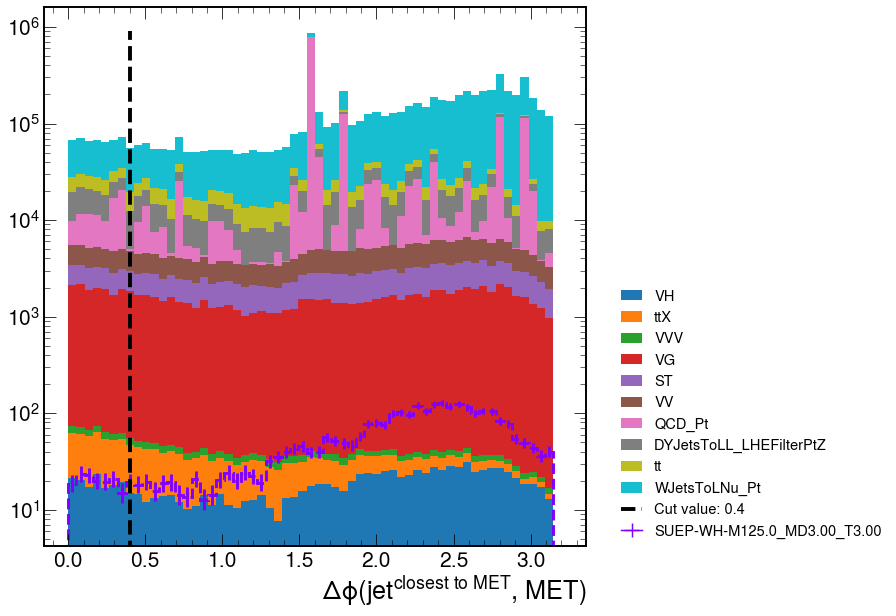

In [11]:
stackedSamples = bkgs
samples = [
    "SUEP-WH-M125.0_MD3.00_T3.00",
]

figs = make_n1_plots(plots, cutflows, "SR", density=False, samples=samples, stackedSamples=stackedSamples)

### Fraction of SR per sample

Show the fraction of each sample out of the total backround as a function of the SUEP candidate # const.

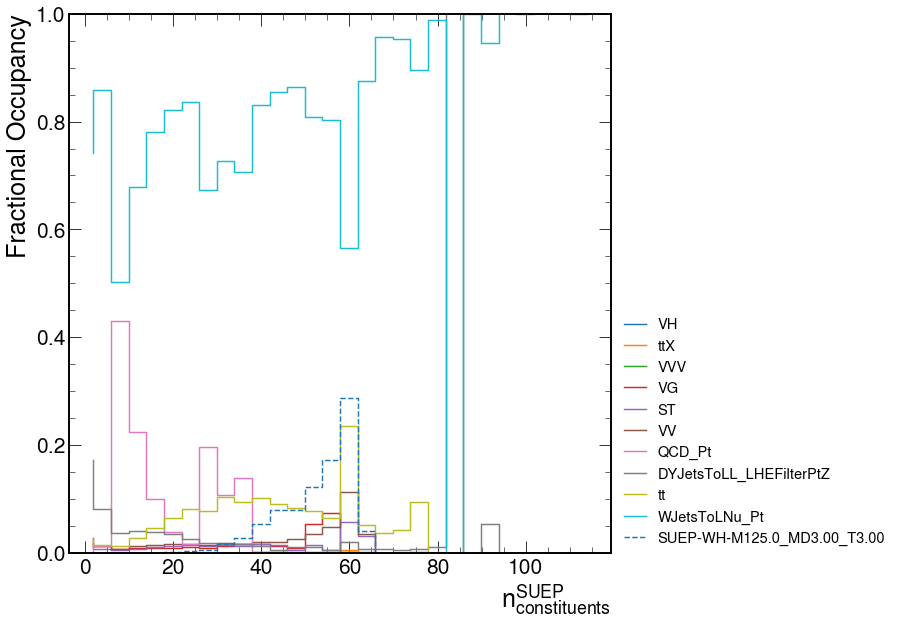

In [12]:
fractions = {}
signals = ['SUEP-WH-M125.0_MD3.00_T3.00']
bkgs_noQCD = bkgs

for s in bkgs_noQCD+signals:
    fractions[s] = plots[s]['2D_SUEP_S1_vs_SUEP_nconst_SR'][::sum, ::4j].values() / plots['MC']['2D_SUEP_S1_vs_SUEP_nconst_SR'][::sum, ::4j].values()

fig, ax = plt.subplots()
for s in fractions.keys():
    if s in bkgs_noQCD: ax.step(plots['MC']['SUEP_nconst_SR'][::4j].axes[0].centers, fractions[s], label=s)
    else: ax.step(plots['MC']['SUEP_nconst_SR'][::4j].axes[0].centers, fractions[s], label=s, linestyle='--')

ax.legend(loc=(1.01, 0), fontsize='xx-small')
ax.set_ylim(0,1)
ax.set_ylabel("Fractional Occupancy")
ax.set_xlabel("$n^{\mathrm{SUEP}}_{\mathrm{constituents}}$")
fig.show()

## CRTT

### Distributions

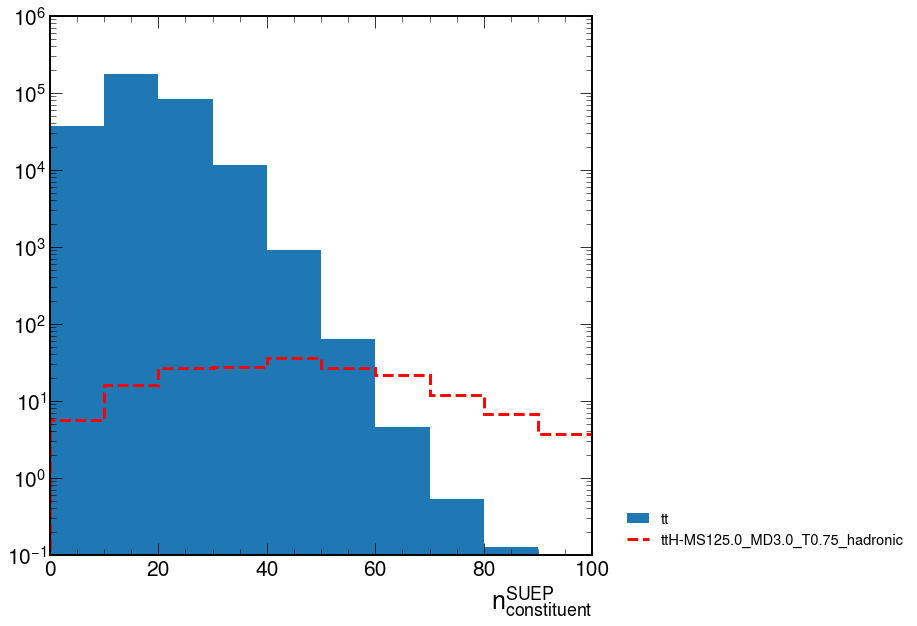

In [13]:
plot_labels = [
    'SUEP_nconst_CRTT',
]
samples = [
    'ttH-MS125.0_MD3.0_T0.75_hadronic'
]
stacked_samples = ['tt']
density = False
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for plot_label in plot_labels:

    fig = plt.figure()
    ax = fig.add_subplot()

    h_samples = []
    h_stacked_samples = []
    for sample in samples:  
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_stacked_samples.append(h)
     
    if len(h_stacked_samples) > 0: hep.histplot(h_stacked_samples, yerr=False, density=density, label=stacked_samples, stack=True, histtype='fill', ax=ax)
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=False, density=density, label=samples, linestyle='dashed', linewidth=3, color=getColors(samples), ax=ax)
        
    # tweak these by hand, as needed
    ax.legend(loc=(1.05,0), fontsize='xx-small')
    ax.set_yscale("log")
    plt.ylim(1e-1, 1e6)
    plt.xlim(0, 100)

    # save and show
    if saveFigs: fig.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    fig.show()

### CRTT vs SR

Compare the shapes of the key variables for the tt background between CRTT and SR.

The shapes should be simliar for the CR to be a reliable estimate of the SR.

(0.5, 2.0)

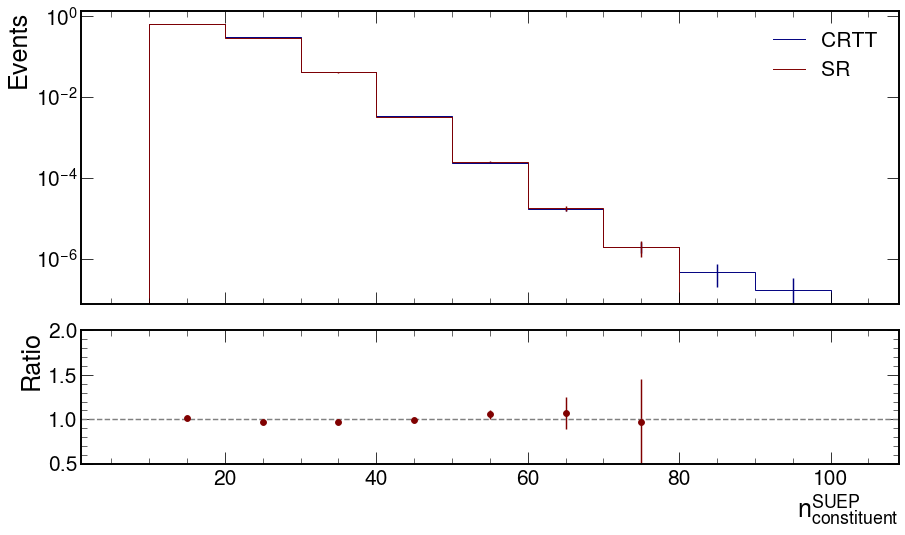

In [14]:
hCRTT = plots['tt']['SUEP_nconst_CRTT'].copy()
hSR = plots['tt']['SUEP_nconst_SR'].copy()
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

hCRTT = rebin_piecewise(hCRTT, new_bins)
hSR = rebin_piecewise(hSR, new_bins)

hCRTT = hCRTT[10j:]
hSR = hSR[10j:]

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2)

(0.5, 2.0)

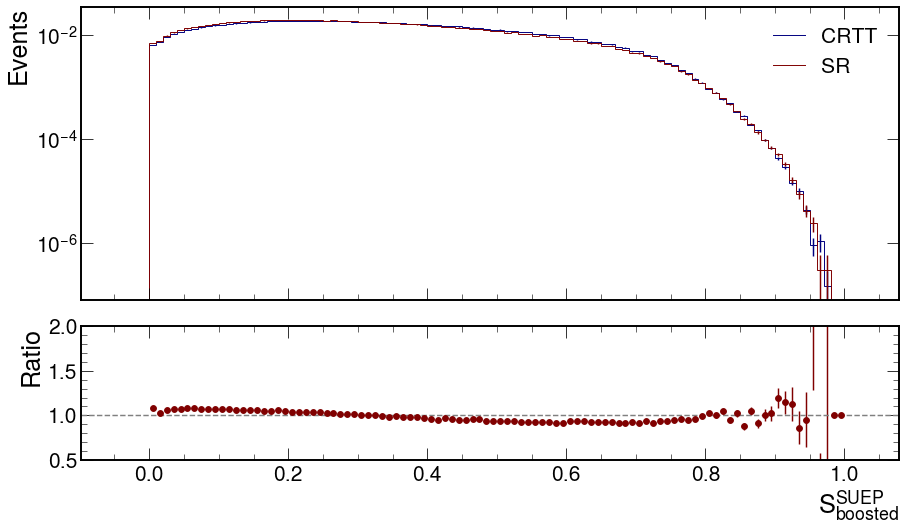

In [15]:
hCRTT = plots['tt']['SUEP_S1_CRTT'].copy()
hSR = plots['tt']['SUEP_S1_SR'].copy()

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2.0)

(0.5, 2.0)

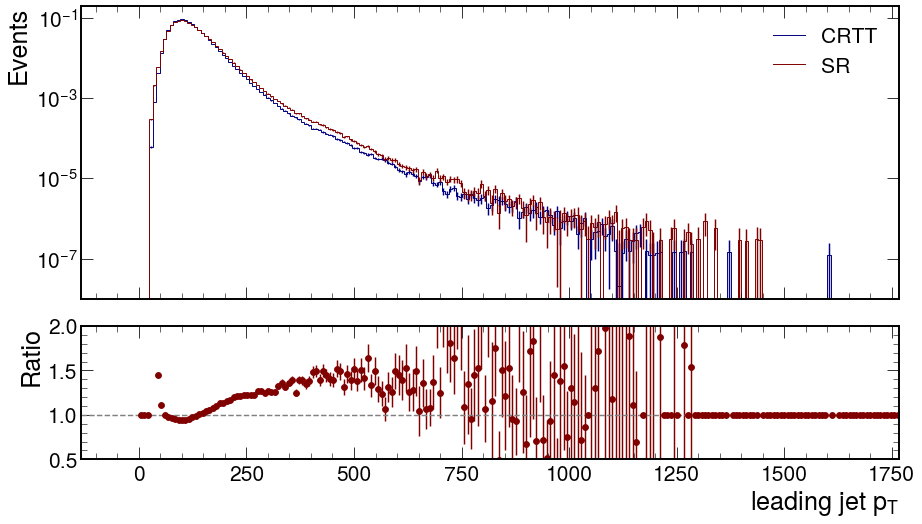

In [16]:
hCRTT = plots['tt']['jet1_pT_CRTT'].copy()[::4j]
hSR = plots['tt']['jet1_pT_SR'].copy()[::4j]

fig, axs = plot_ratio([hCRTT, hSR], ['CRTT', 'SR'], density=True)
axs[1].set_ylim(0.5, 2.0)

### Closure

Check ABCD method closure in CRTT

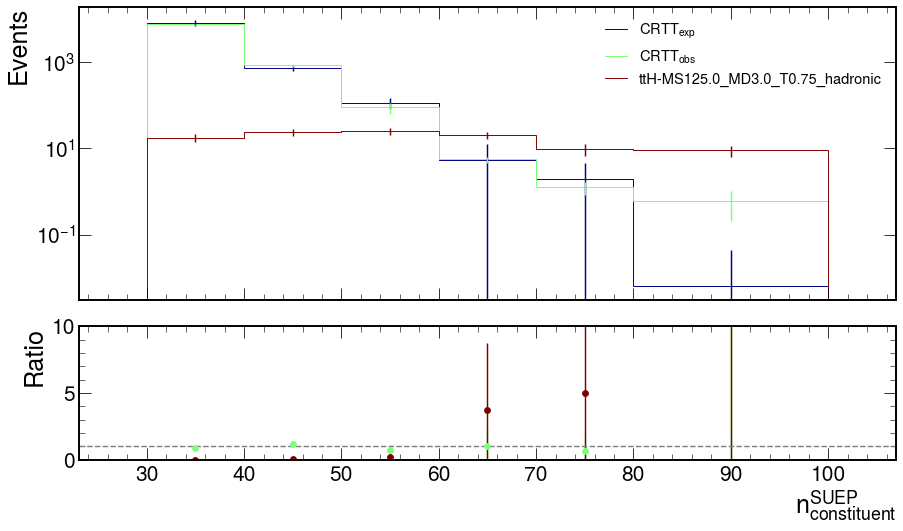

In [17]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[0.3j, 0.4j], [0.4j, 0.5j], [0.5j, 1.0j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)
hTTH = plots['ttH-MS125.0_MD3.0_T0.75_hadronic']['2D_SUEP_S1_vs_SUEP_nconst_CRTT'][0.5j::sum,30j:]
hTTH = rebin_piecewise(hTTH, [30, 40, 50, 60, 70, 80, 100])

fig, axs = plot_ratio([SR_exp, SR, hTTH], labels=["$CRTT_{exp}$", "$CRTT_{obs}$", 'ttH-MS125.0_MD3.0_T0.75_hadronic'])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].legend(fontsize='xx-small')

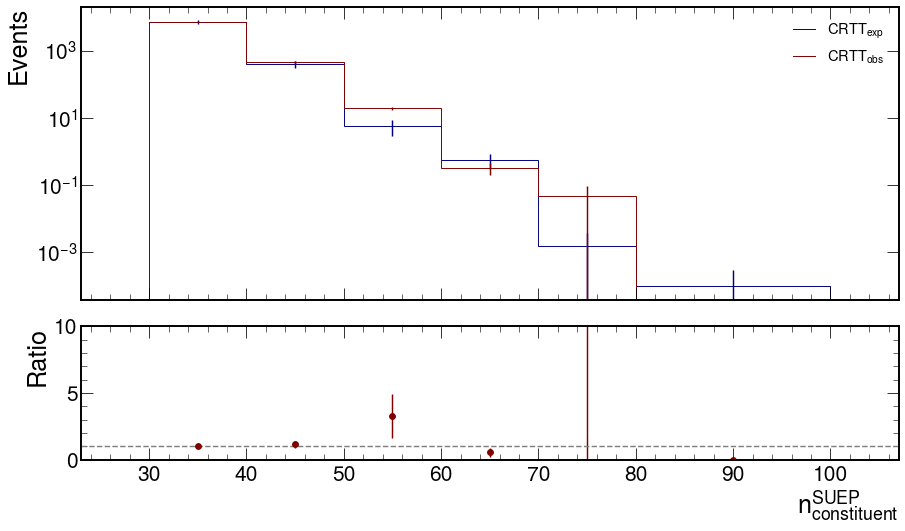

In [18]:
plot_label = '2D_jet1_pT_vs_SUEP_nconst_CRTT'
new_bins = [30, 40, 50, 60, 70, 80, 100]
rebin = True
xregions = [[330j, 10000j], [130j, 230j], [30j, 130j]]
yregions = [[10j, 20j], [20j, 30j], [30j, 500j]]
sample = 'MC'


abcd = plots[sample][plot_label]

SR, SR_exp = ABCD_9regions_errorProp(abcd, xregions, yregions, sum_var='x', approx=False, new_bins=new_bins)

fig, axs = plot_ratio([SR_exp, SR], labels=["$CRTT_{exp}$", "$CRTT_{obs}$"])
_ = axs[1].set_ylim(0.0, 10.0)
axs[0].legend(fontsize='xx-small')

### Cutflows

Yields
+-------------------------------------------------+-----------------------------+----------------------------------+------------+
|                    Selection                    | SUEP-WH-M125.0_MD3.00_T3.00 | ttH-MS125.0_MD3.0_T0.75_hadronic |     tt     |
+-------------------------------------------------+-----------------------------+----------------------------------+------------+
|                      Total                      |            25807            |              29831               | 2.7135e+07 |
|                     Gen cuts                    |            25807            |              29831               | 2.7135e+07 |
|                     Triggers                    |            9153.2           |              7336.5              | 1.1332e+07 |
|                 Quality filters                 |             9152            |              7332.1              | 1.1325e+07 |
|              ZH & ggF orthogonality             |            8482.3           |  

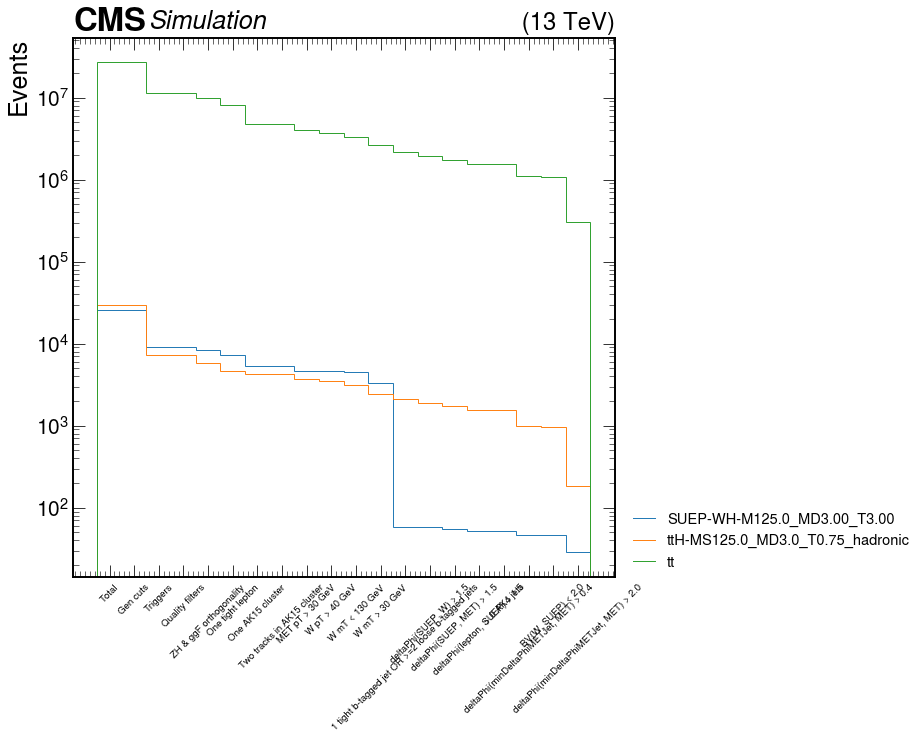

In [21]:
samples= [
    'SUEP-WH-M125.0_MD3.00_T3.00',
    "ttH-MS125.0_MD3.0_T0.75_hadronic"
] + ['tt']
selections = [
    'total', 
    'genCuts', 'allTriggers',  'qualityFilters', 'orthogonality', 'oneLepton', 'oneCluster', 'twoTracksInCluster',
    'MET_pt_>_30.0_CRTT',
    'W_pT_from_MET_>_40.0_CRTT',
    "W_mT_from_MET_<_130.0_SR", "W_mT_from_MET_>_30.0_CRTT",
    'bjetSel_==_0.0_CRTT',
    'deltaPhi_SUEP_W_>_1.5_CRTT', 'deltaPhi_SUEP_MET_>_1.5_CRTT', 'deltaPhi_lepton_SUEP_>_1.5_CRTT',
    #'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_CRTT',
    'ngood_ak4jets_>_0.0_CRTT',
    'deltaPhi_minDeltaPhiMETJet_MET_>_0.4_CRTT',
    'W_SUEP_BV_<_2.0_CRTT',
    'deltaPhi_minDeltaPhiMETJet_MET_>_1.5_CRTT',
    #'nphotons_==_0.0_HighestPT',
    #'ngood_ak4jets_<_4.0_HighestPT',
    #'nak4jets_outsideSUEP_<_2.0_HighestPT'
]
selection_labels = [
    'Total',
    'Gen cuts', 'Triggers', 'Quality filters', 'ZH & ggF orthogonality', 'One tight lepton', 'One AK15 cluster', 'Two tracks in AK15 cluster',
    'MET pT > 30 GeV',
    'W pT > 40 GeV',
    "W mT < 130 GeV", "W mT > 30 GeV",
    '1 tight b-tagged jet OR >=2 loose b-tagged jets',
    'deltaPhi(SUEP, W) > 1.5', 'deltaPhi(SUEP, MET) > 1.5', 'deltaPhi(lepton, SUEP) > 1.5',
    '> 0 AK4 jets',
    'deltaPhi(minDeltaPhiMETJet, MET) > 0.4',
    'BV(W, SUEP) < 2.0',
    'deltaPhi(minDeltaPhiMETJet, MET) > 2.0',
]

table = cutflow_table(cutflows, samples, selections, selection_labels, sig_figs=5)
print("Yields")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, efficiencies=True, sig_figs=3)
print("Efficiencies")
print(table)

table = cutflow_table(cutflows, samples, selections, selection_labels, relative_efficiencies=True, sig_figs=2)
print("Relative efficiencies")
print(table)

fig, ax = cutflow_plot(cutflows, samples, selections, selection_labels)
fig.show()

### N-1 Plots

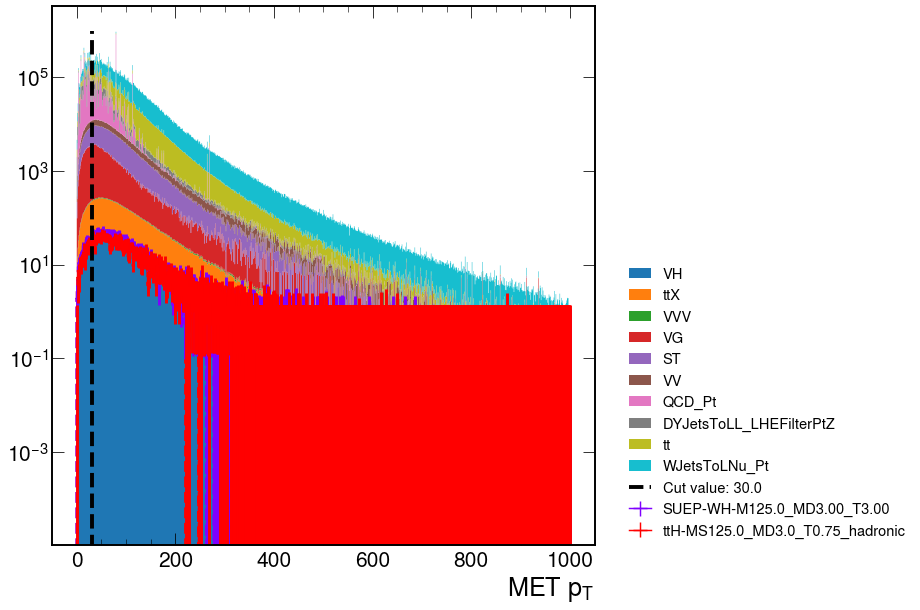

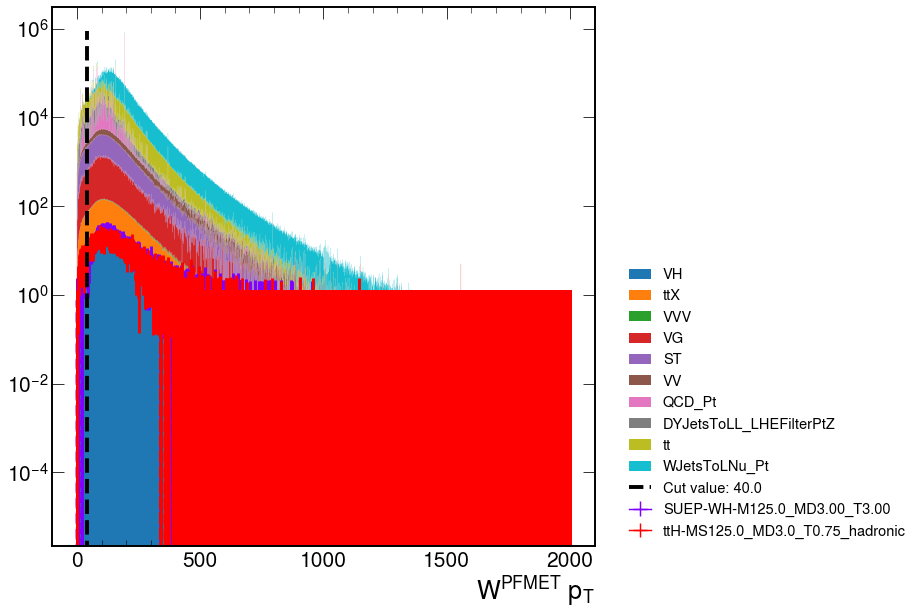

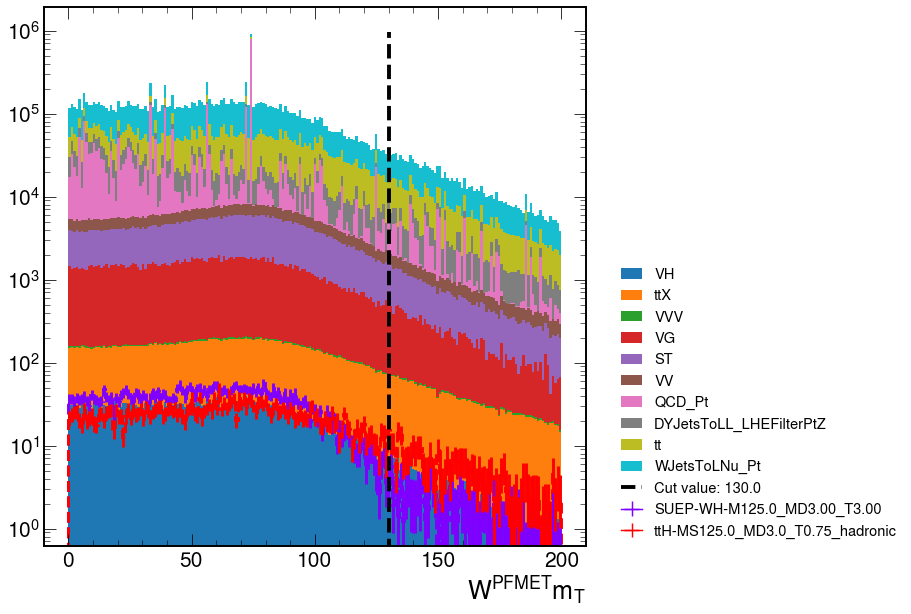

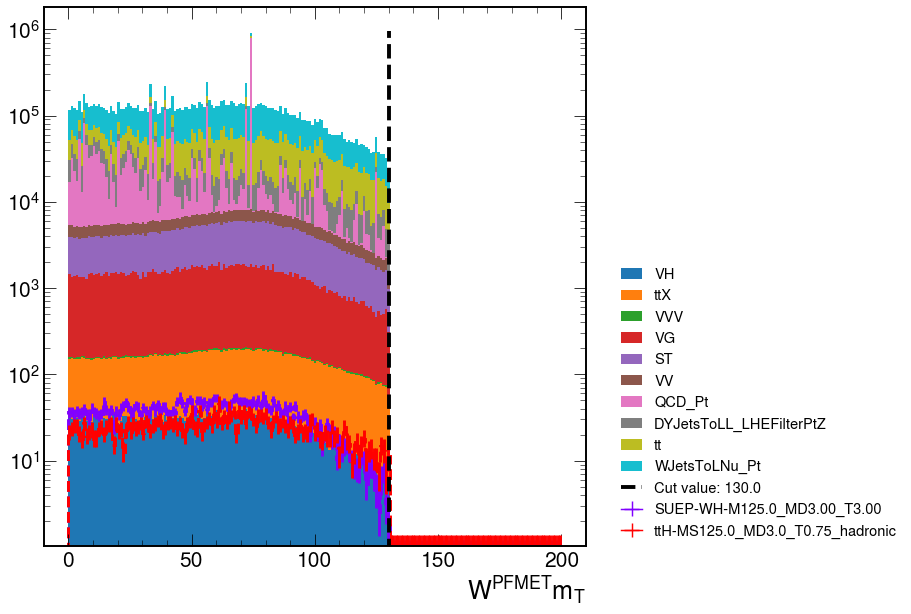

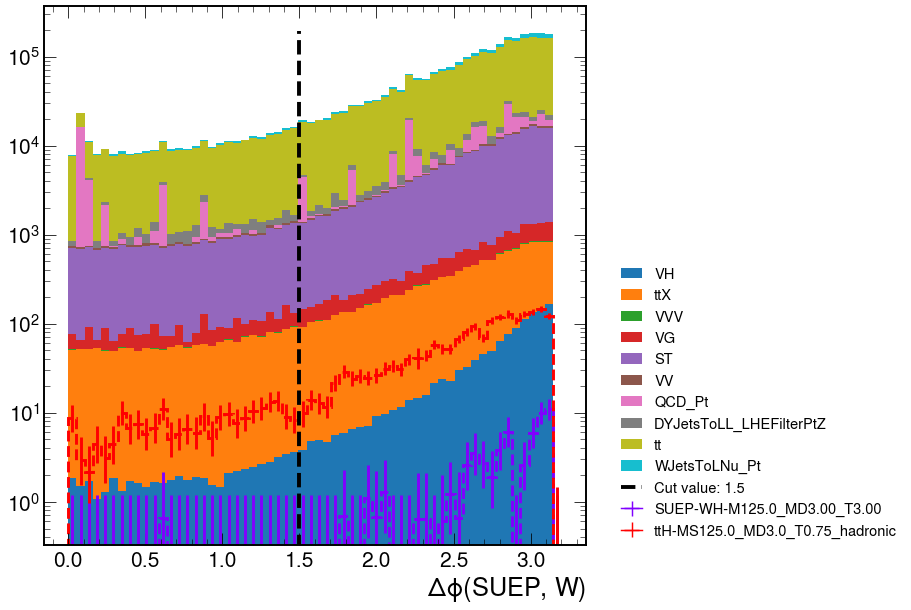

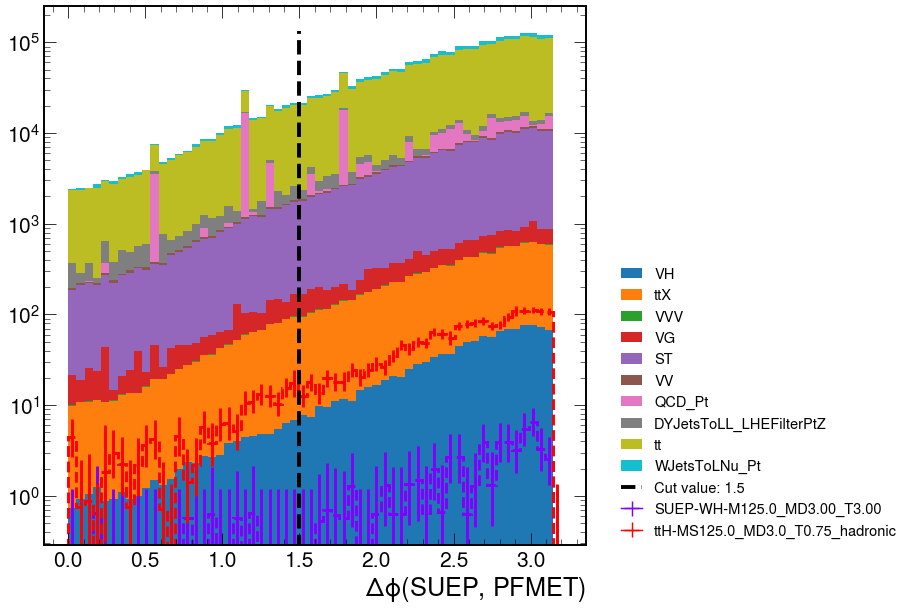

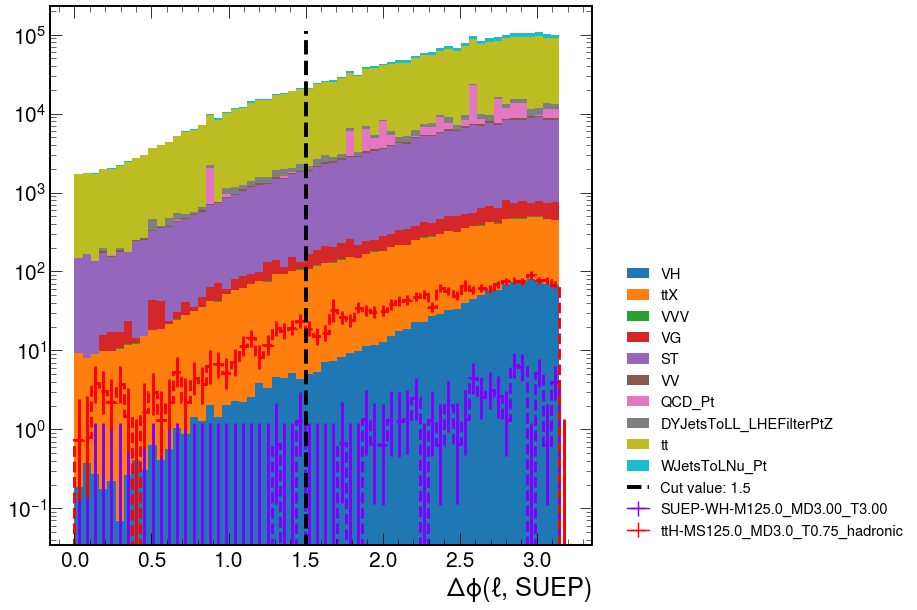

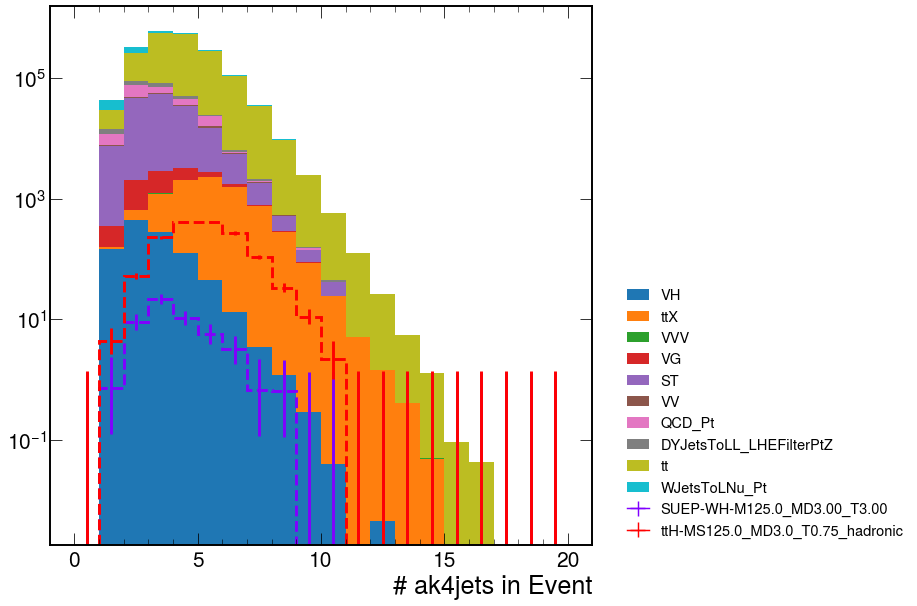

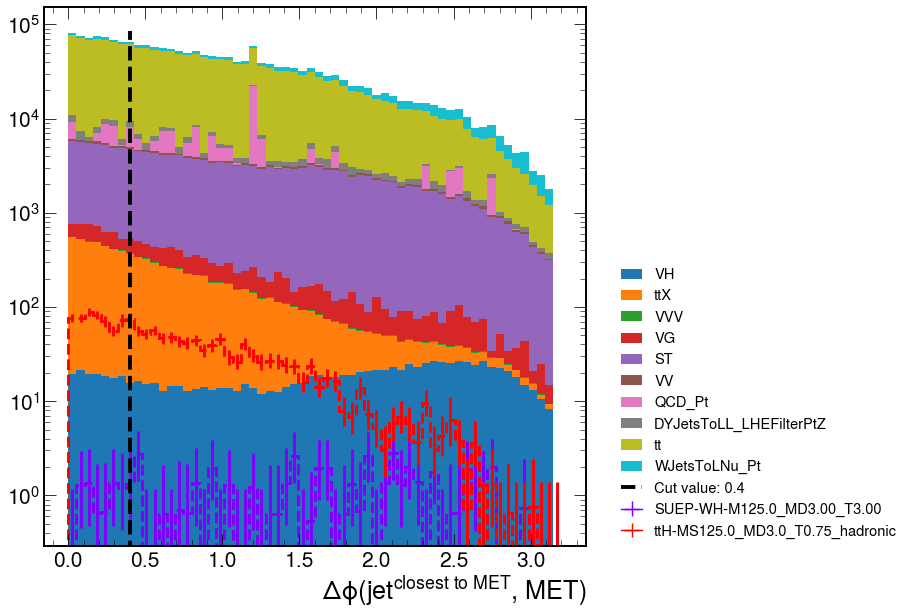

In [22]:
stackedSamples = bkgs
samples = [
    "SUEP-WH-M125.0_MD3.00_T3.00",
    "ttH-MS125.0_MD3.0_T0.75_hadronic"
]

figs = make_n1_plots(plots, cutflows, "CRTT", samples=samples, stackedSamples=stackedSamples)


### ttH & WH Contamination

Find the samples with highest yields in CRTT in high # constituents region.

ttH-MS125.0_MD3.0_T0.75_hadronic:
  45.64% of total
ttHToNonbb_M125:
  0.32% of total
ttHTobb_M125:
  0.15% of total
WHleptonicpythia_hadronic_M125.0_MD3.00_T0.75_HT-1_UL18_NANOAOD_WH_4_2_ABCD:
  11.41% of total
WHleptonicpythia_generic_M125.0_MD3.00_T3.00_HT-1_UL18_NANOAOD_WH_4_2_ABCD:
  0.83% of total


(0.0, 5.0)

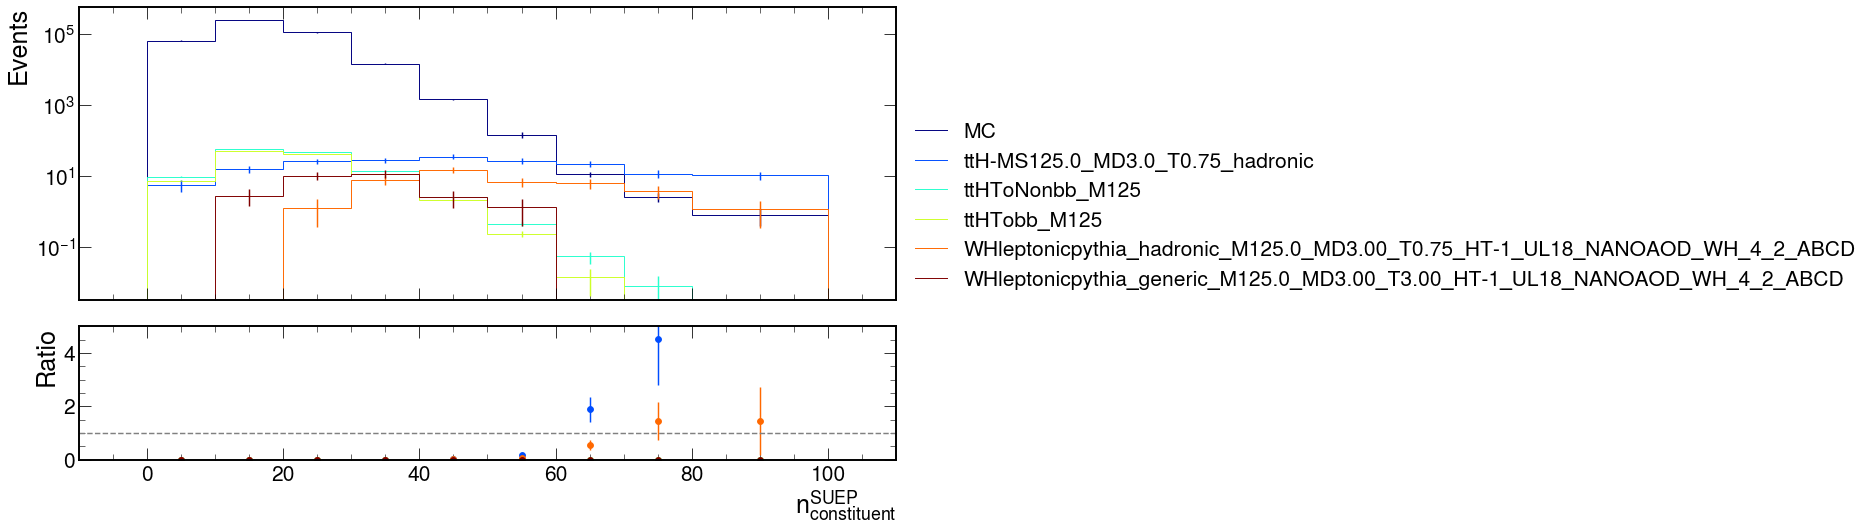

In [23]:
ttH_samples = np.array([s for s in plots.keys() if s.startswith('ttH')])
wh_samples = np.array([s for s in plots.keys() if s.startswith('WHleptonic')])

# integrate SUEP nconst > 30 to f
tth_yields = []
for ttH_sample in ttH_samples:
    nevents = plots[ttH_sample]['SUEP_nconst_CRTT'][50j:].sum().value
    tth_yields.append(nevents)
wh_yields = []
for wh_sample in wh_samples:
    nevents = plots[wh_sample]['SUEP_nconst_CRTT'][50j:].sum().value
    wh_yields.append(nevents)

# highest 5 contaminants
tth_yields = np.array(tth_yields)
wh_yields = np.array(wh_yields)
highest_tth_yields = tth_yields[np.argsort(tth_yields)[::-1]][:5]
highest_wh_yields = wh_yields[np.argsort(wh_yields)[::-1]][:5]
highest_tth_samples = ttH_samples[np.argsort(tth_yields)[::-1]][:5]
highest_wh_samples = wh_samples[np.argsort(wh_yields)[::-1]][:5]

nbkg = plots['MC']['SUEP_nconst_CRTT'][50j:].sum().value 
for yield_, sample in zip(highest_tth_yields, highest_tth_samples):
    print(f"{sample}:")
    print(f"  {yield_ / nbkg:.2%} of total")
for yield_, sample in zip(highest_wh_yields, highest_wh_samples):
    print(f"{sample}:")
    print(f"  {yield_ / nbkg:.2%} of total")

# make a plot of the highest 5 contaminants
hlist, samples = [], []
new_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100]
hBkg = plots['MC']['SUEP_nconst_CRTT'].copy()
hBkg = rebin_piecewise(hBkg, new_bins)
hlist.append(hBkg)
samples.append('MC')
for yield_, sample in zip(highest_tth_yields, highest_tth_samples):
    hTTH = plots[sample]['SUEP_nconst_CRTT'].copy()
    hTTH = rebin_piecewise(hTTH, new_bins)
    hlist.append(hTTH)
    samples.append(sample)
for yield_, sample in zip(highest_wh_yields, highest_wh_samples):
    hWH = plots[sample]['SUEP_nconst_CRTT'].copy()
    hWH = rebin_piecewise(hWH, new_bins)
    hlist.append(hWH)
    samples.append(sample)

fig, axs = plot_ratio(hlist, samples)
axs[0].legend(loc=(1.01, 0))
axs[1].set_ylim(0, 5)

# General Plotting

## 1D Plots
Plot some of the 1D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_labels`: _list of str_, which plots to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>
`density`: _bool_, whether to plot histograms normalized to unity. <br>


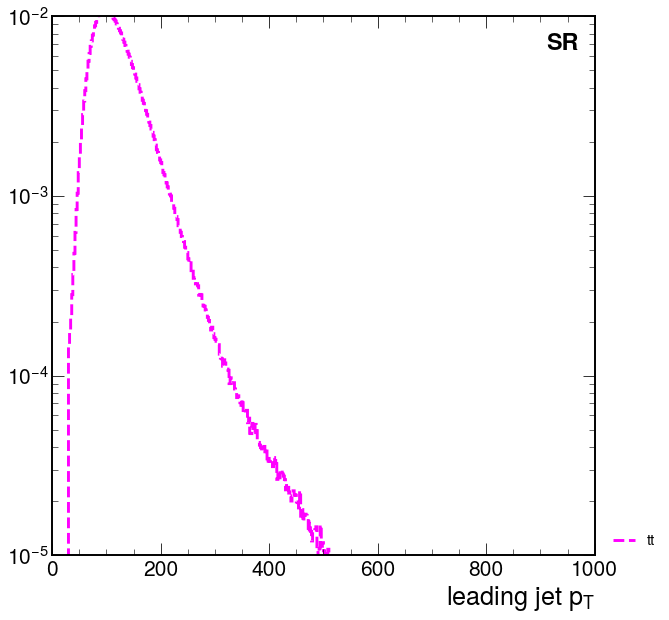

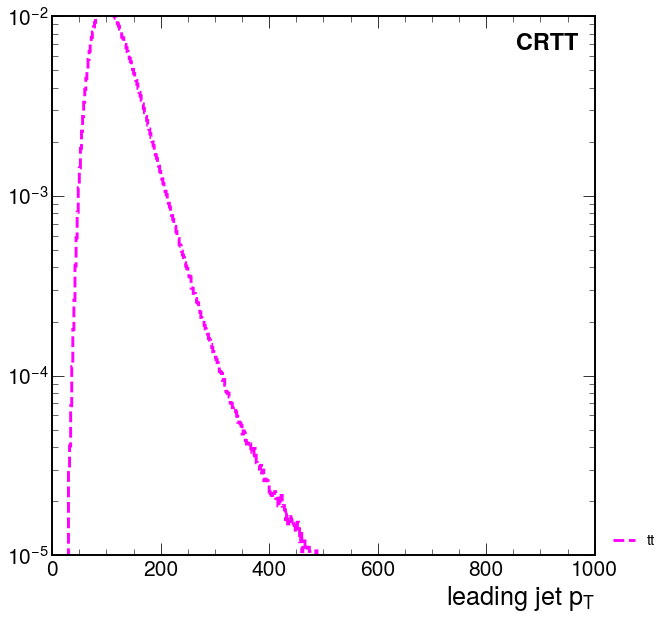

In [24]:
plot_labels = [
    'jet1_pT_SR',
    'jet1_pT_CRTT'
]
samples = [
    #'SUEP-WH-M125.0_MD3.00_T3.00',
    'tt',
]
labels_samples = [
    #'SUEP-WH-M125.0_MD3.00_T3.00',
    'tt',
]
stacked_samples = []
new_bins = None #[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
density = True
yerr = False
saveFigs = False

for plot_label in plot_labels:

    plt.figure()

    h_samples = []
    h_stacked = []
    for sample in samples: 
        h = plots[sample][plot_label]#[:100j:sum, :]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_samples.append(h)
    for sample in stacked_samples:
        h = plots[sample][plot_label]#[:100j:sum, :]
        if new_bins: h = rebin_piecewise(h, new_bins)
        h_stacked.append(h)
     
    if len(h_stacked) > 0: hep.histplot(h_stacked, yerr=yerr, density=density, label=stacked_samples, stack=True, histtype='fill')
    if len(h_samples) > 0: hep.histplot(h_samples, yerr=yerr, density=density, label=labels_samples, linestyle='dashed', linewidth=3, color=['fuchsia'])
        
    # tweak these by hand, as needed
    plt.legend(loc=(1.02,0), fontsize='xx-small')
    plt.yscale("log")
    plt.ylim(1e-5, 1e-2)
    plt.xlim(0, 1000)

    region = plot_label.split("_")[-1]
    plt.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

    # save and show
    if saveFigs:
        plt.savefig(output_label + plot_label + ".pdf", bbox_inches='tight')
        plt.savefig(output_label + plot_label + ".png", bbox_inches='tight')
    plt.show()


## 2D Plots

Plot some of the 2D histograms for any number of samples in the same plot.<br>
Parameters:<br>
`plot_label`: _str_, which plot to show.<br>
`samples`: _list of str_, which samples to include in the plot.<br>

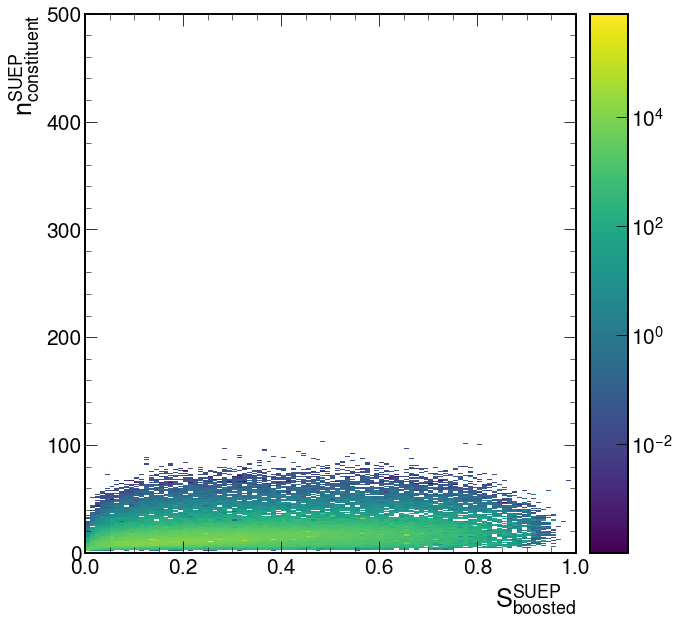

In [29]:
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_SR'
samples = ['MC']

for sample in samples:
    
    if plots[sample][plot_label].sum().value == 0:
        print("Histogram empty for sample", sample)
        continue

    hep.hist2dplot(plots[sample][plot_label][:,:], 
               norm=matplotlib.colors.LogNorm(),
               label=sample) 
        
    #plt.ylim(0,100)
    if saveFigs: plt.savefig(output_label + plot_label+ "_"+sample+file_ext)
    plt.show()

### 2D Hist Slices
Slice a 2D histogram and plot the slices; you can stack them and plot their densities.

(0.0, 100.0)

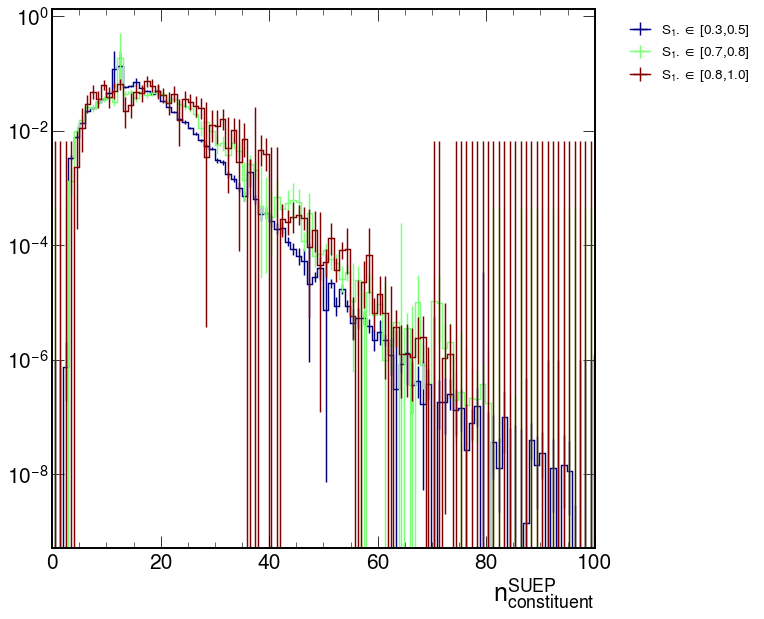

In [35]:
sample = 'MC'
slice_var = 'x'
plot_label = '2D_SUEP_S1_vs_SUEP_nconst_SR'
stack = False
density = True
regions_list = [[0.3j, 0.5j],[0.7j,0.8j],[0.8j,1.0j]]


labels = [r"$S_1. \in$ [{},{}]".format(round(regions[0].imag, 1), round(regions[1].imag, 1)) for regions in regions_list]
h = plots[sample][plot_label]
fig, ax = plot_sliced_hist2d(h, regions_list, density=density, stack=stack, slice_var=slice_var, labels=labels)
plt.xlim(0, 100)

## Ratios

### Compare Samples

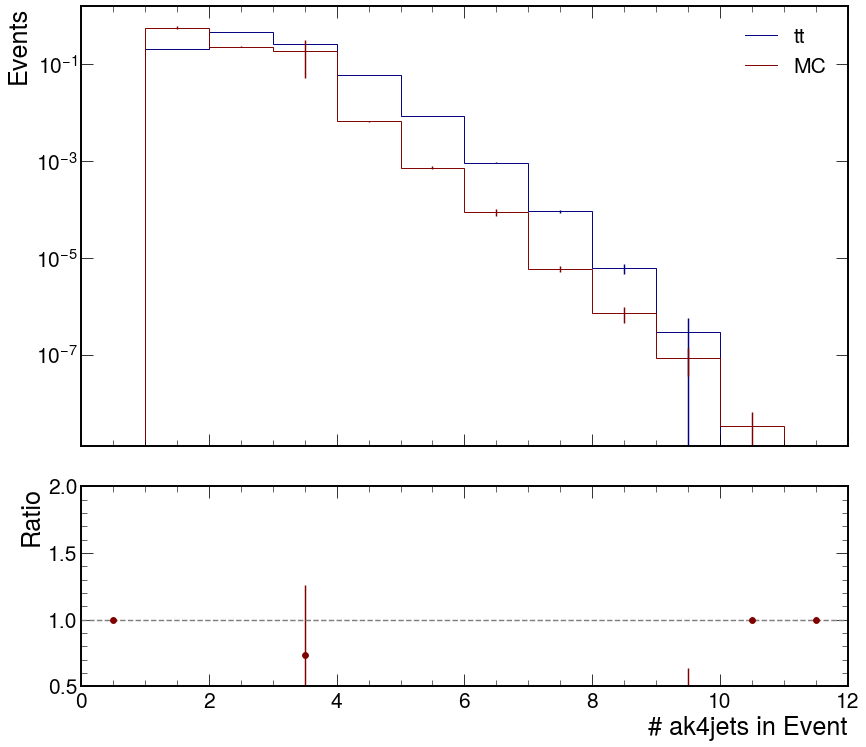

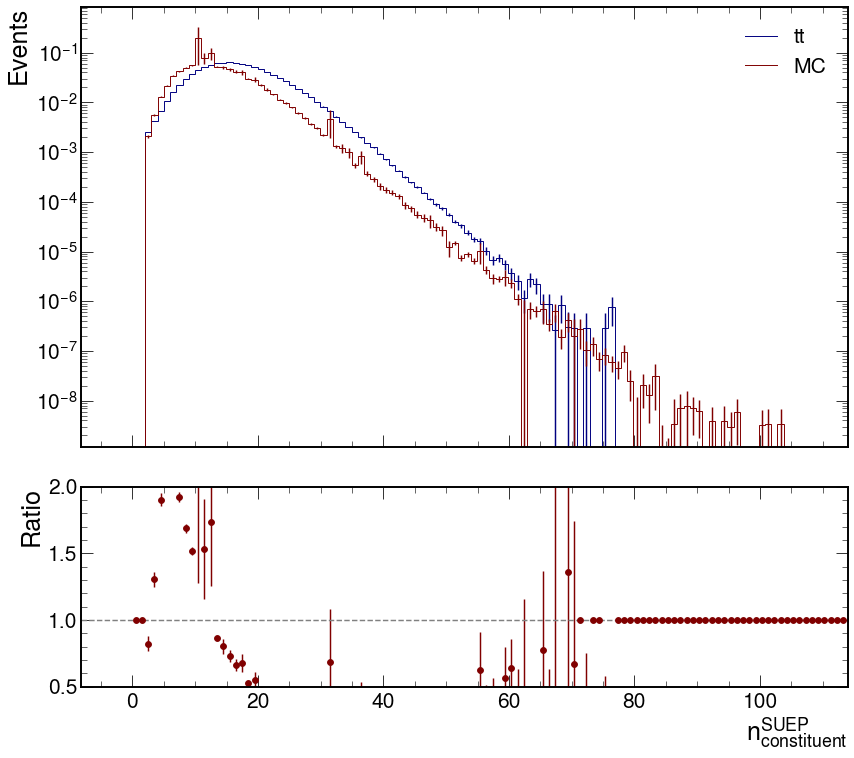

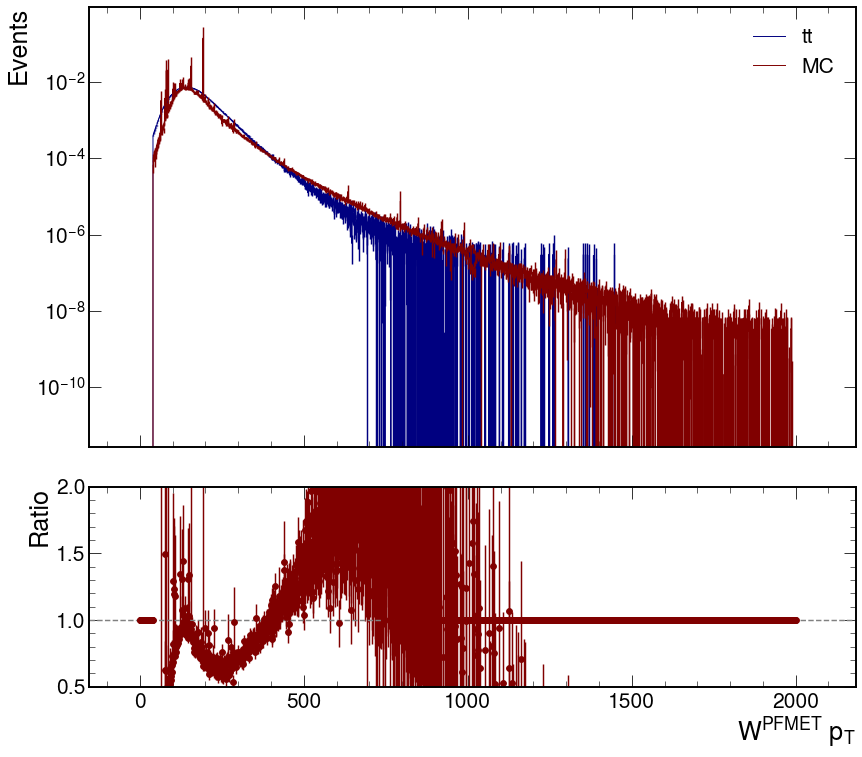

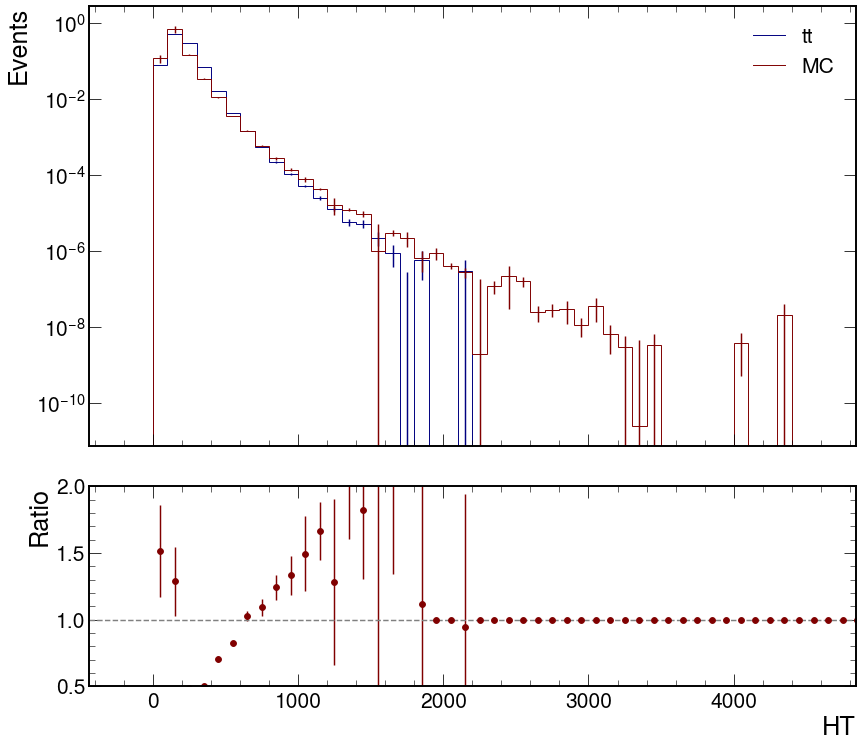

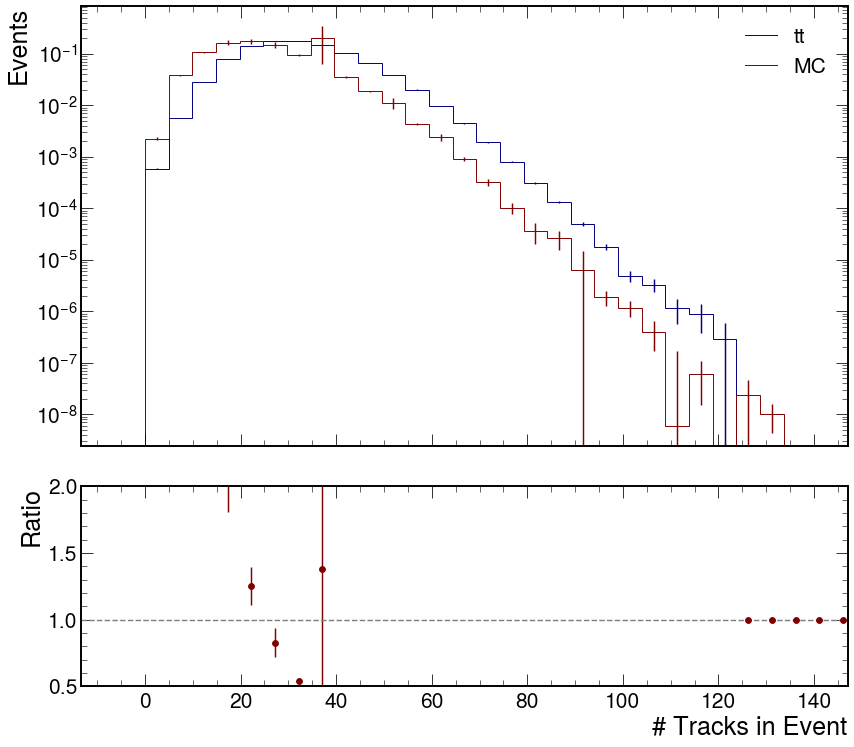

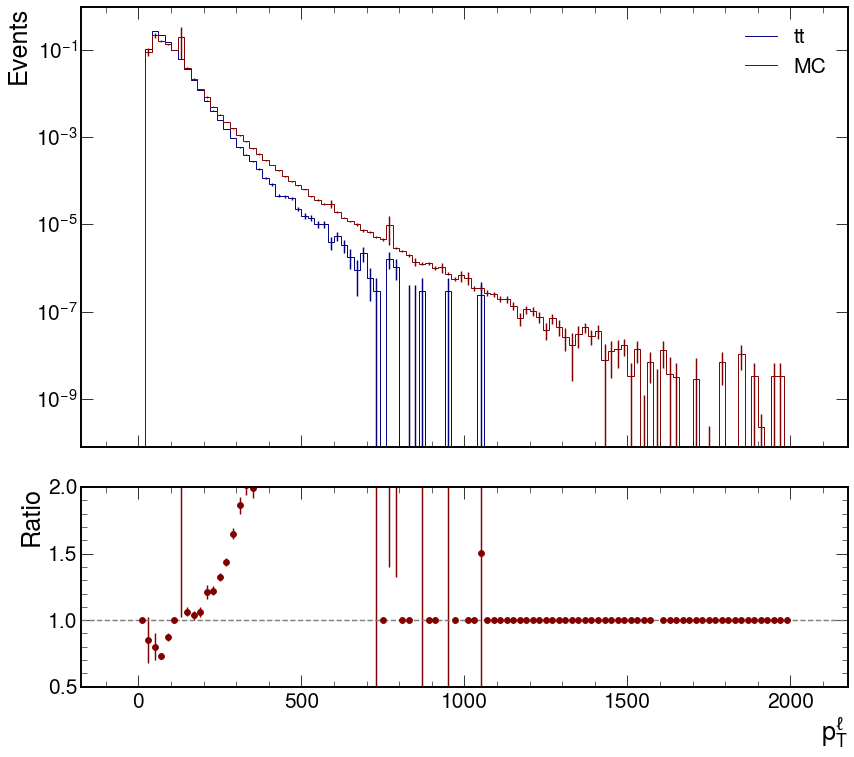

In [38]:
plot_labels = [
    'ngood_ak4jets_SR',
    'SUEP_nconst_SR',
    'W_pT_from_MET_SR',
    'ht_SR',
    'ntracks_SR',
    'lepton_pt_SR',
]
samples = [
    'tt',
    'MC',
]
density = True
saveFigs = False

for plot_label in plot_labels:

    hlist = [plots[sample][plot_label][::1j] for sample in samples]

    fig, axs = plot_ratio(hlist, samples, density=density)
    fig.set_size_inches(15, 18)

    axs[0].legend()
    axs[0].legend(loc='best')
    axs[1].set_ylim(0.5,2.0)
    #axs[0].set_xlim(0,1000)
    
    if saveFigs: plt.savefig(output_label + plot_label + file_ext, bbox_inches='tight')
    plt.show()

### Compare Variables

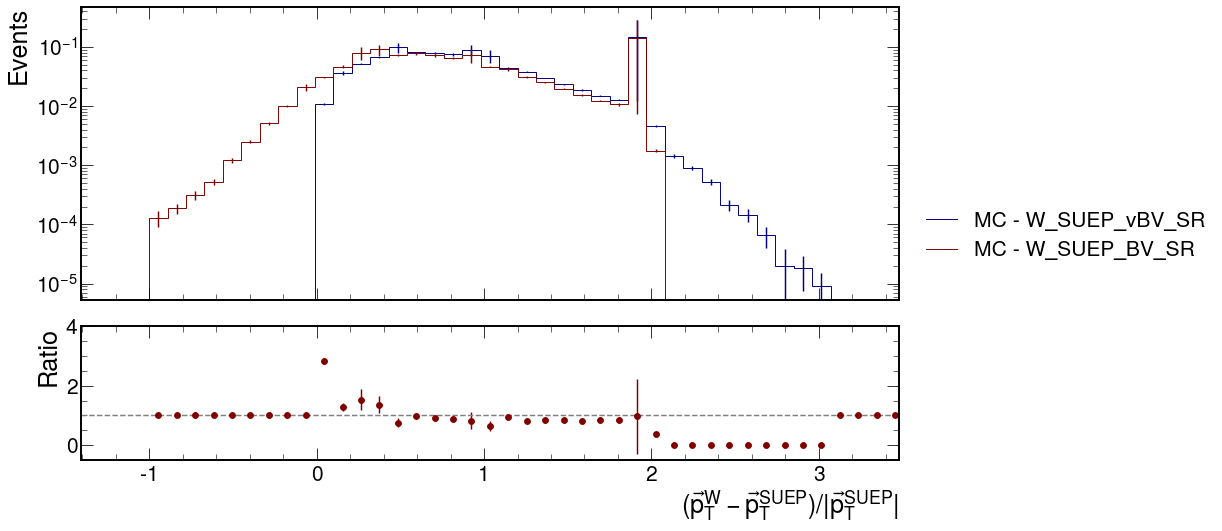

In [39]:
plot_labels = ['W_SUEP_vBV_SR', 'W_SUEP_BV_SR']
samples = ['MC']
density = False

hlist, labels = [], []
for plot_label in plot_labels:
    for sample in samples:
        hlist.append(plots[sample][plot_label])
        labels.append(sample + " - " + plot_label)

# our custom ratio calculates errors differently, more appropriate for plotting densities
fig, axs = plot_ratio(hlist, labels, density=True)
axs[0].legend(loc=(1.02,0.1))
axs[1].set_ylim(-0.5, 4.0)

if saveFigs: plt.savefig(output_label + "ratio_".join(plot_labels) + file_ext, bbox_inches='tight')
plt.show()

### Ratios of Slices
Slice a 2D histogram for both two samples or variables and plot ratio of each of the slices.

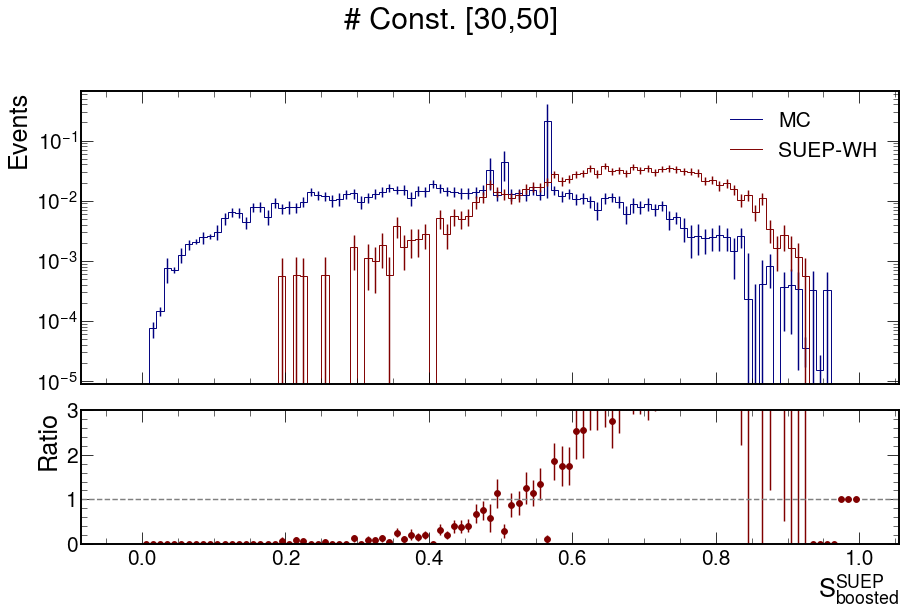

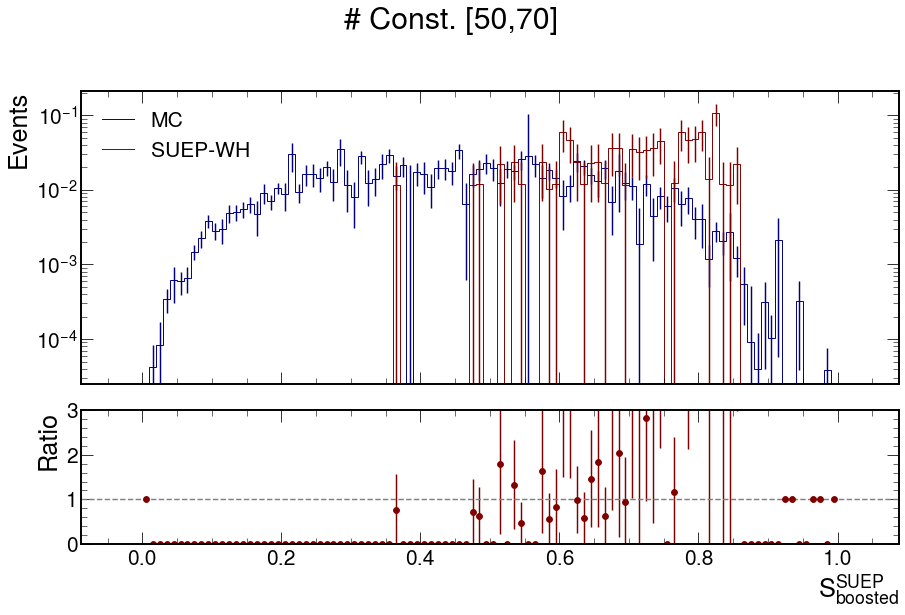

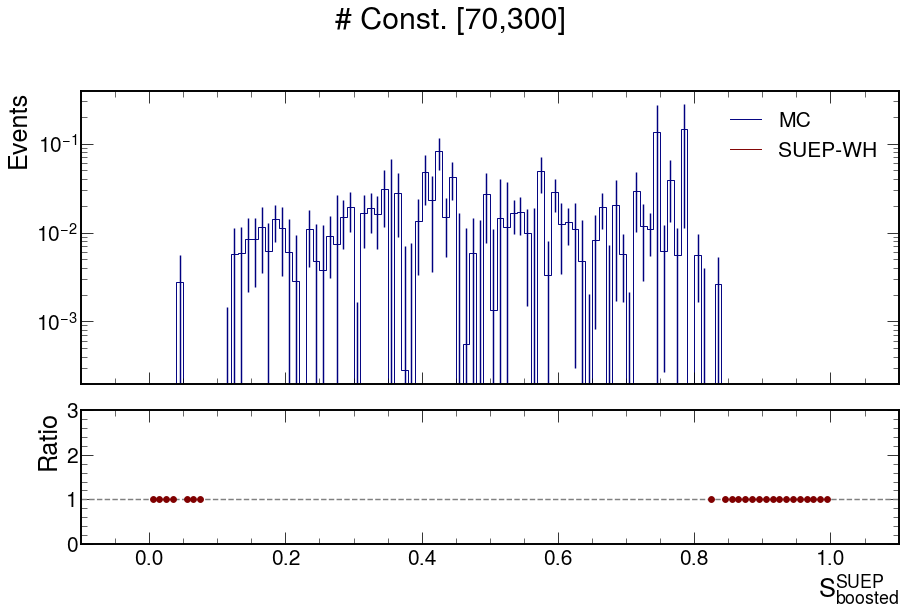

In [42]:
h1 = plots['MC']["2D_SUEP_S1_vs_SUEP_nconst_SR"]
h2 = plots['SUEP-WH-M125.0_MD3.00_T3.00']["2D_SUEP_S1_vs_SUEP_nconst_SR"]

regions_list = [[30j,50j], [50j,70j], [70j,300j]]
h1_slices = slice_hist2d(h1, regions_list, slice_var='y')
h2_slices = slice_hist2d(h2, regions_list, slice_var='y')

for h1_slice, h2_slice, regions in zip(h1_slices, h2_slices, regions_list):
    
    h1_slice = h1_slice[:]
    h2_slice = h2_slice[:]
    
    h1_slice = h1_slice/h1_slice.sum().value
    h2_slice = h2_slice/h2_slice.sum().value
  
    fig, axs = plot_ratio([h1_slice, h2_slice], ['MC', 'SUEP-WH'], density=True)
    axs[0].legend()
    axs[1].set_ylim(0, 3)
    
    fig.suptitle("# Const. [{},{}]".format(int(regions[0].imag), int(regions[1].imag)))
    plt.show()

## Automatic Plotting
Plot all histograms and save them automatically.<br>

### All 1D and 2D Plots

SUEP_nconst_SR, 
SUEP_S1_SR, 
ht_SR, 
ht_JEC_SR, 
ht_JEC_JER_up_SR, 
ht_JEC_JER_down_SR, 
ht_JEC_JES_up_SR, 
ht_JEC_JES_down_SR, 
ntracks_SR, 
ngood_fastjets_SR, 
PV_npvs_SR, 
Pileup_nTrueInt_SR, 
ngood_ak4jets_SR, 
ngood_ak4jets_noLepIso_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
2D_SUEP_S1_vs_SUEP_nconst_SR, 
2D_SUEP_S1_vs_ntracks_SR, 
SUEP_genMass_SR, 
SUEP_pt_SR, 
SUEP_delta_pt_genPt_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
SUEP_pt_avg_SR, 
SUEP_pt_avg_b_SR, 
SUEP_eta_SR, 
SUEP_phi_SR, 
SUEP_mass_SR, 
SUEP_delta_mass_genMass_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram empty for sample ttH-MS125.0_MD3.0_T0.75_hadronic, Histogram empty for sample tt, 
SUEP_ISR_deltaPhi_SR, Histogram empty for sample SUEP-WH-M125.0_MD3.00_T0.75, Histogram em

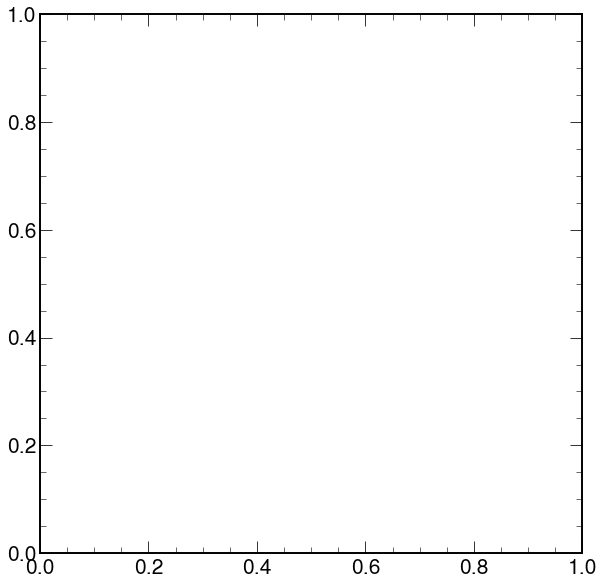

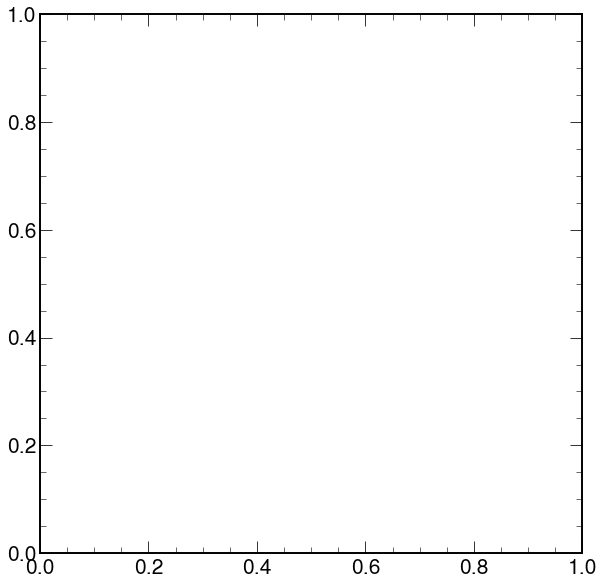

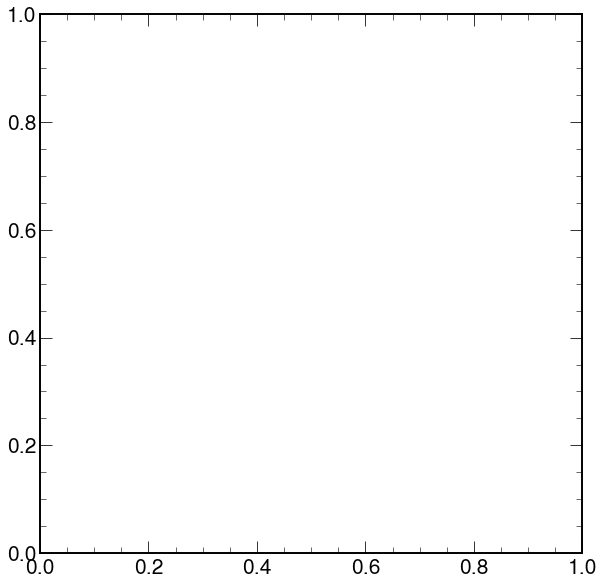

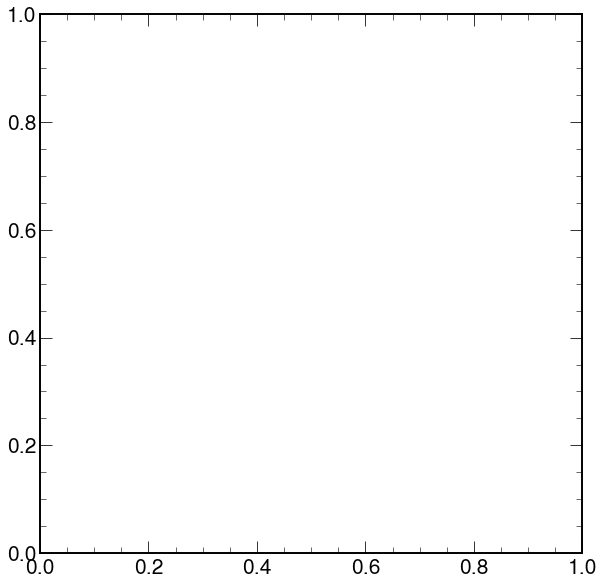

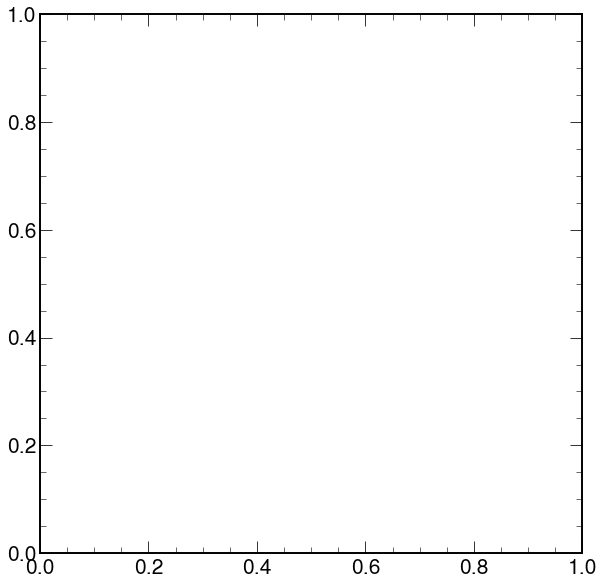

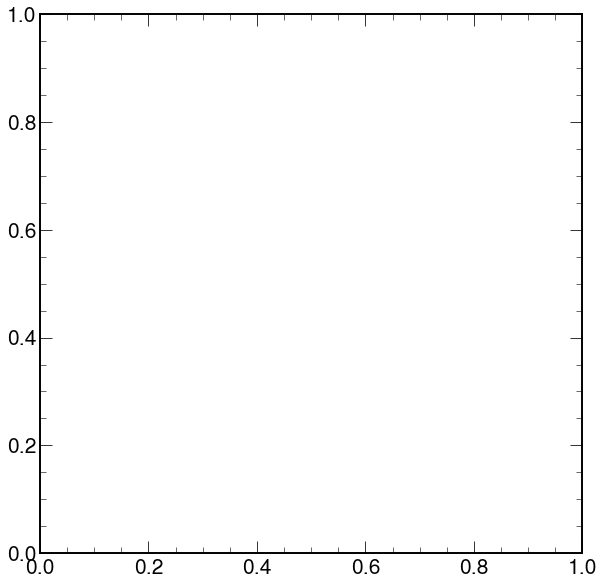

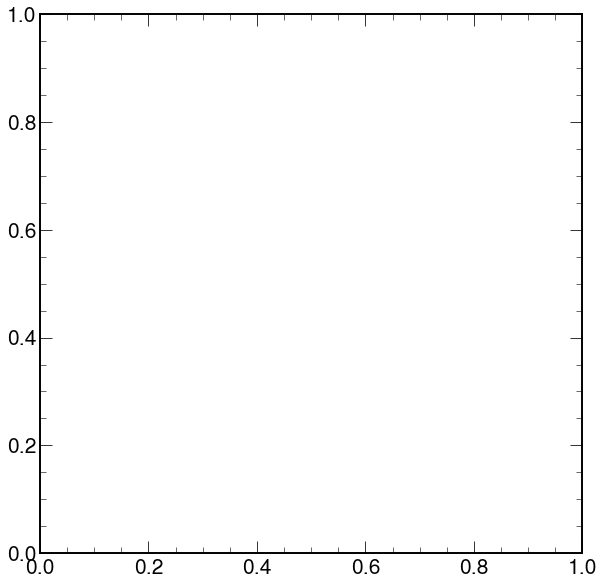

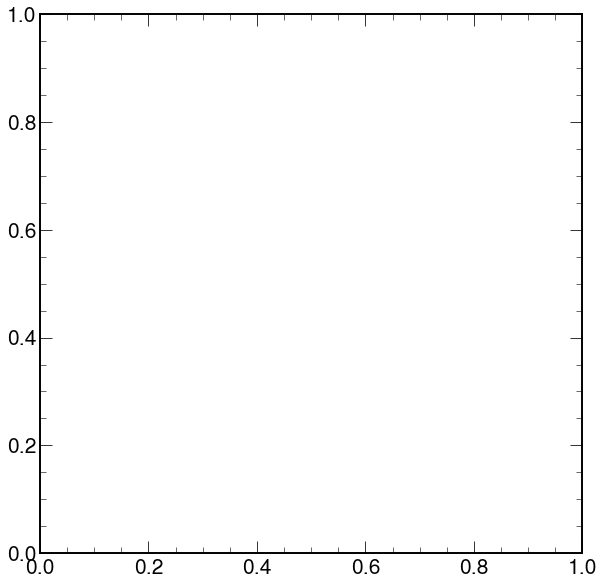

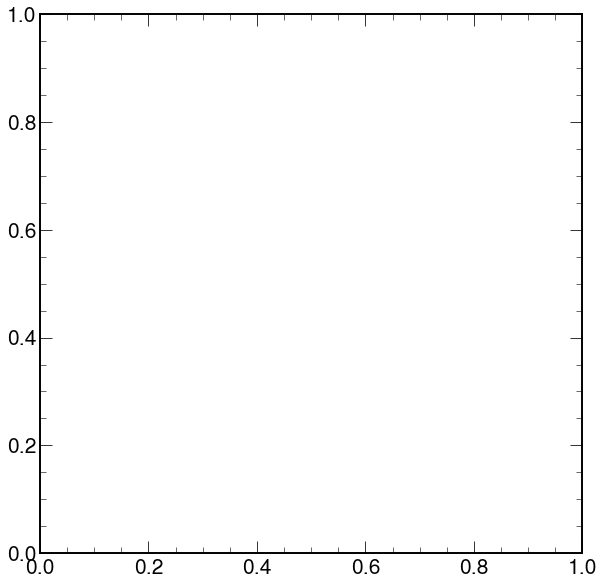

In [171]:
outdir = 'allplots/'
unstacked_samples = [
    'SUEP-WH-M125.0_MD3.00_T0.75',
    'ttH-MS125.0_MD3.0_T0.75_hadronic',
    'tt',
]
stacked_samples = []
density = True
yerr = False

all_samples = unstacked_samples + stacked_samples
plot_labels = [k for k in list(plots[all_samples[0]].keys())]
if not os.path.isdir(output_label+outdir): os.system("mkdir " + str(output_label+outdir))

for plot_label in plot_labels:
    print(plot_label, end=", ")

    fig = plt.figure()
    ax = fig.add_subplot()
    
    # 2D plots
    if '2D' in plot_label:    
        for sample in stacked_samples:
            if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue

            # plot each sample separately
            h = plots[sample][plot_label]
            hep.hist2dplot(h, 
                       norm=matplotlib.colors.LogNorm(),
                       label=sample,
                       ax=ax) 
            fig.savefig(output_label + outdir + plot_label+ "_"+sample+file_ext, bbox_inches='tight')
            plt.close()
        
    # 1D variables
    else:

        # plot all samples in same histogram
        stacked_hists, stacked_histlabels = [], []
        unstacked_hists, unstacked_histlabels = [], []
        for sample in all_samples:
            if plots[sample][plot_label].sum().value == 0:
                print("Histogram empty for sample", sample, end=", ")
                continue
        
        # plot everything
        for sample in all_samples:
            h = plots[sample][plot_label]
            if sample in stacked_samples: 
                stacked_hists.append(h)
                stacked_histlabels.append(sample)
            elif sample in unstacked_samples:
                unstacked_hists.append(h)
                unstacked_histlabels.append(sample)

        region = plot_label.split("_")[-1]
        ax.text(0.97, 0.97, region, transform=plt.gca().transAxes, fontsize=24, fontweight='bold', va='top', ha='right')

        if len(stacked_hists) > 0: hep.histplot(stacked_hists, label=stacked_histlabels, yerr=yerr, density=density, stack=True, histtype='fill', ax=ax)
        if len(unstacked_hists) > 0: hep.histplot(unstacked_hists, label=unstacked_histlabels, yerr=yerr, density=density, stack=False, histtype='step', ax=ax)
        if len(stacked_hists) > 0 or len(unstacked_hists) > 0:
            ax.legend(loc=(1.02,0), fontsize='xx-small')
            ax.set_yscale("log")
            #ax.set_ylim(1e-5,1e0)
            fig.savefig(output_label + 'allplots/' + plot_label + ".pdf", bbox_inches='tight')
            fig.savefig(output_label + 'allplots/' + plot_label + ".png", bbox_inches='tight')
        plt.close()

    print()
print("All done")

### All Ratios: 1D Plots
For each 1D histogram, make a ratio plot between two samples.

In [ ]:
plot_labels = list(plots['QCD_HT_2018'].keys())
density = False
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if '2D' in plot_label: continue

        print(plot_label, end=", ")
        h1 = plots[l1][plot_label]
        h2 = plots[l2][plot_label]
        
        if h1.sum().value == 0 or h2.sum().value == 0: continue
        
        if density: 
            h1 = h1/h1.sum().value
            h2 = h2/h2.sum().value
            fig, axs, _ = plot_ratio(h1, h2, label1=l1, label2=l2)
            axs[0].legend()
        else:
            fig = plt.figure(figsize=(10, 8))
            _ = h1.plot_ratio(h2,
                             rp_num_label=l1,
                             rp_denom_label=l2)
            fig.axes[0].set_yscale("log")
            fig.axes[1].set_ylim(0.4,1.6)
            
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()

    print("All done")

### All Ratios: Combined Regions

In [ ]:
density = True

plot_labels = list(plots['QCD_HT_2018'].keys())
combos = [['QCD_HT_2018','data_2018']]

for l1, l2 in combos:
    
    outdir = l1+"_"+l2+"_combinedRegions/"
    print(outdir)

    if not os.path.isdir(output_label+outdir): 
        os.system("mkdir " + str(output_label+outdir))

    for plot_label in plot_labels:

        if "A_" not in plot_label: continue
        print(plot_label, end=", ")
        
        h1 = plots[l1][plot_label.replace("A_", "")]
        h2 = plots[l2][plot_label.replace("A_", "")]
        if h1.sum().value == 0 or h2.sum().value == 0:
            print("Empty", end=", ")
            continue
            
        # x or y define order of regions
        x = 'ABCDEFGH'
        y = 'ADGBEHCF'
        _ = plot_ratio_regions(plots, plot_label, l1, l2, x, density=density)
        plt.savefig(output_label + outdir + plot_label +file_ext, bbox_inches='tight')
        plt.close()